In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from glob import glob
import os
from matplotlib.lines import Line2D



In [2]:
path = '/Users/zcaspar/codes/Diagnostics2/'
#root_path = '/home/datawork-lops-osi/equinox/jetn/'
#run = 'jet_cfg1_wp*_m1a1_4km_500a1000j/'
#path = root_path+run+'diagnostics/'

In [3]:
ds80 = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_param_fit_T80*'))] #local
ds40 = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_param_fit_T40*'))] #local
#ds80 = [xr.open_dataset(file) for file in sorted(glob(path+'ZC_param_fit_T80.nc'))] #datarmor
#ds40 = [xr.open_dataset(file) for file in sorted(glob(path+'ZC_param_fit_T40*'))]  #datarmor
#ds_U = [xr.open_dataset(file) for file in sorted(glob(path+'jet*1000j/'+'ZC_U*'))]

In [4]:
number = len(ds80)
cmap_Ta = plt.get_cmap('Greys')
cmap_Te = plt.get_cmap('Blues')
cmap_Tl = plt.get_cmap('Reds')
colors_Ta = [cmap_Ta(i) for i in np.linspace(0.5, 1, number)]
colors_Te = [cmap_Te(i) for i in np.linspace(.5, 1, number)]
colors_Tl = [cmap_Tl(i) for i in np.linspace(.5, 1, number)]

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


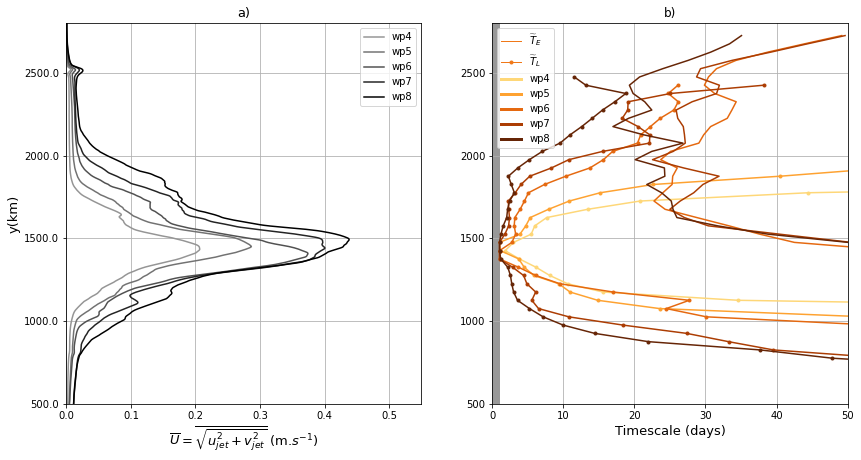

In [6]:
fontsize = 13
number = len(ds80)
cmap = plt.get_cmap('YlOrBr')
colors = [cmap(i) for i in np.linspace(0.3, 1, number)]
custom_lines = [
                Line2D([0], [0], color=cmap(.6), lw=1),
                Line2D([0], [0], color=cmap(.6), lw=1,marker='.')
                ]
labels=[r'$\widetilde{T}_E$', r'$\widetilde{T}_L$']
fig,ax = plt.subplots(1,2,figsize=(14,7))
for i,d in enumerate(ds80):
    file = sorted(glob(path+'wp*'))[i]
    wp = file[-1]
    d['Uprime'].plot(ax=ax[0],y='y_rho',c=colors_Ta[i],label='wp'+wp)
    ax[0].set_ylim(500*1e3,2800*1e3)
    laby = ax[0].get_yticks();laby = [str(l*1e-3) for l in laby];
    ax[0].set_yticklabels(laby)
    d['E_u_avg'].sel(param='Tt').plot(ax=ax[1],y='ybin',c=colors[i])
    d['L_u_avg'].sel(param='Tt').plot(ax=ax[1],y='ybin',c=colors[i],marker='.')
    custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
    labels.append('wp'+wp)
ax[0].set_xlabel(r'$\overline{U}= \overline{\sqrt{u_{jet}^2+v_{jet}^2}}$ (m.$s^{-1}$)',fontsize=fontsize);ax[0].set_ylabel(r'y(km)',fontsize=fontsize);
ax[0].set_title('a)',fontsize=fontsize)
ax[0].grid();ax[1].grid();ax[1].set_title('b)');ax[1].set_ylabel('')
ax[1].legend(custom_lines, labels)
ax[1].set_xlabel('Timescale (days)',fontsize=fontsize)
ax[1].set_ylim(500,2800);ax[0].legend();ax[0].set_xlim(0,0.55);ax[1].set_xlim(0,50)
ax[1].axvspan(0, 1, facecolor='0.2', alpha=0.5)
fig.savefig('/Users/zcaspar/codes/figure6.pdf')

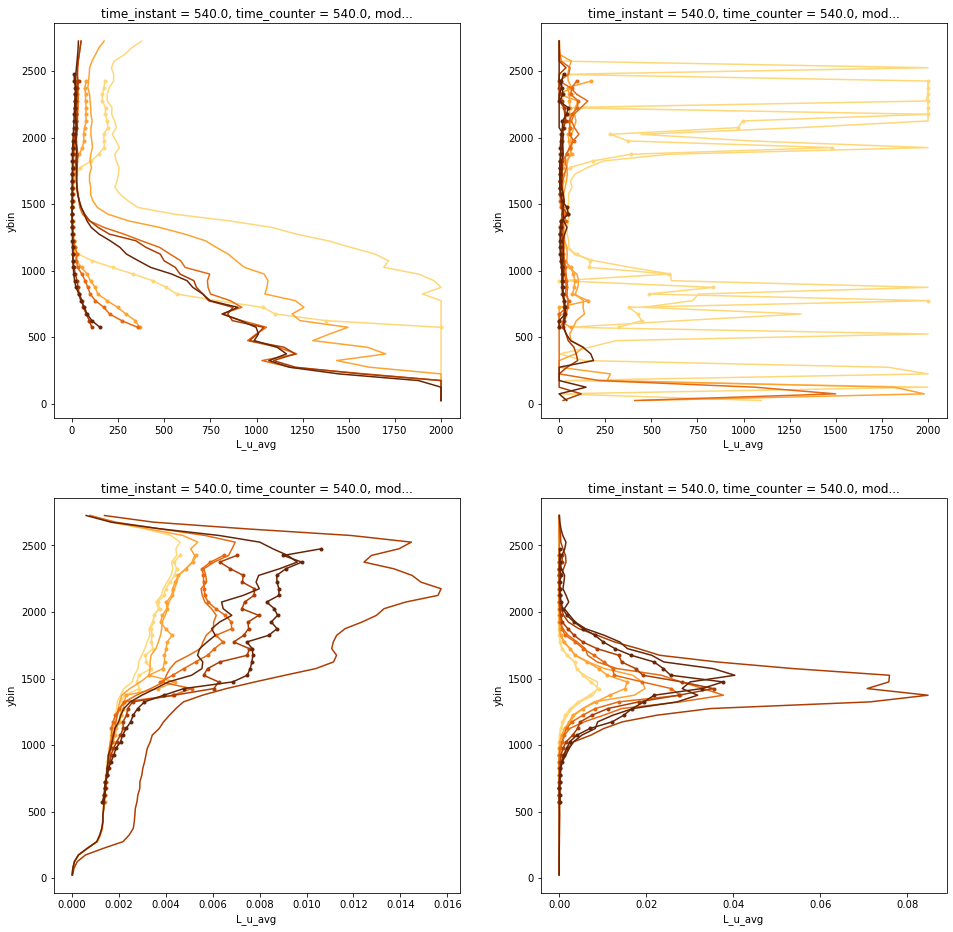

In [7]:
fig,ax = plt.subplots(2,2,figsize=(16,16))
for i,d in enumerate(ds80):
    file = sorted(glob(path+'wp*'))[i]
    wp = file[-1]
    #d['Uprime'].plot(ax=ax[0,0],y='y_rho',c=colors_Ta[i],label='wp'+wp)
    #ax[0].set_ylim(500*1e3,2800*1e3)
    #laby = ax[0].get_yticks();laby = [str(l*1e-3) for l in laby];
    #ax[0].set_yticklabels(laby)
    d['E_u_avg'].sel(param='Tt').plot(ax=ax[0,0],y='ybin',c=colors[i])
    d['L_u_avg'].sel(param='Tt').plot(ax=ax[0,0],y='ybin',c=colors[i],marker='.')
    d['E_u_avg'].sel(param='Tb').plot(ax=ax[0,1],y='ybin',c=colors[i])
    d['L_u_avg'].sel(param='Tb').plot(ax=ax[0,1],y='ybin',c=colors[i],marker='.')
    d['E_u_avg'].sel(param='Xtilde').plot(ax=ax[1,0],y='ybin',c=colors[i])
    d['L_u_avg'].sel(param='Xtilde').plot(ax=ax[1,0],y='ybin',c=colors[i],marker='.')
    d['E_u_avg'].sel(param='Xbar').plot(ax=ax[1,1],y='ybin',c=colors[i])
    d['L_u_avg'].sel(param='Xbar').plot(ax=ax[1,1],y='ybin',c=colors[i],marker='.')
   # ax[0,1].set_xlim(0,200)
    custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
    labels.append('wp'+wp)
#ax[0].set_xlabel(r'$\overline{U}= \overline{\sqrt{u_{jet}^2+v_{jet}^2}}$ (m.$s^{-1}$)',fontsize=fontsize);ax[0].set_ylabel(r'y(km)',fontsize=fontsize);
#ax[0].set_title('a)',fontsize=fontsize)
#ax[0].grid();ax[1].grid();ax[1].set_title('b)');ax[1].set_ylabel('')
#ax[1].legend(custom_lines, labels)
#ax[1].set_xlabel('Timescale (days)',fontsize=fontsize)
#ax[1].set_ylim(500,2800);ax[0].legend();ax[0].set_xlim(0,0.55);ax[1].set_xlim(0,50)
#ax[1].axvspan(0, 1, facecolor='0.2', alpha=0.5)

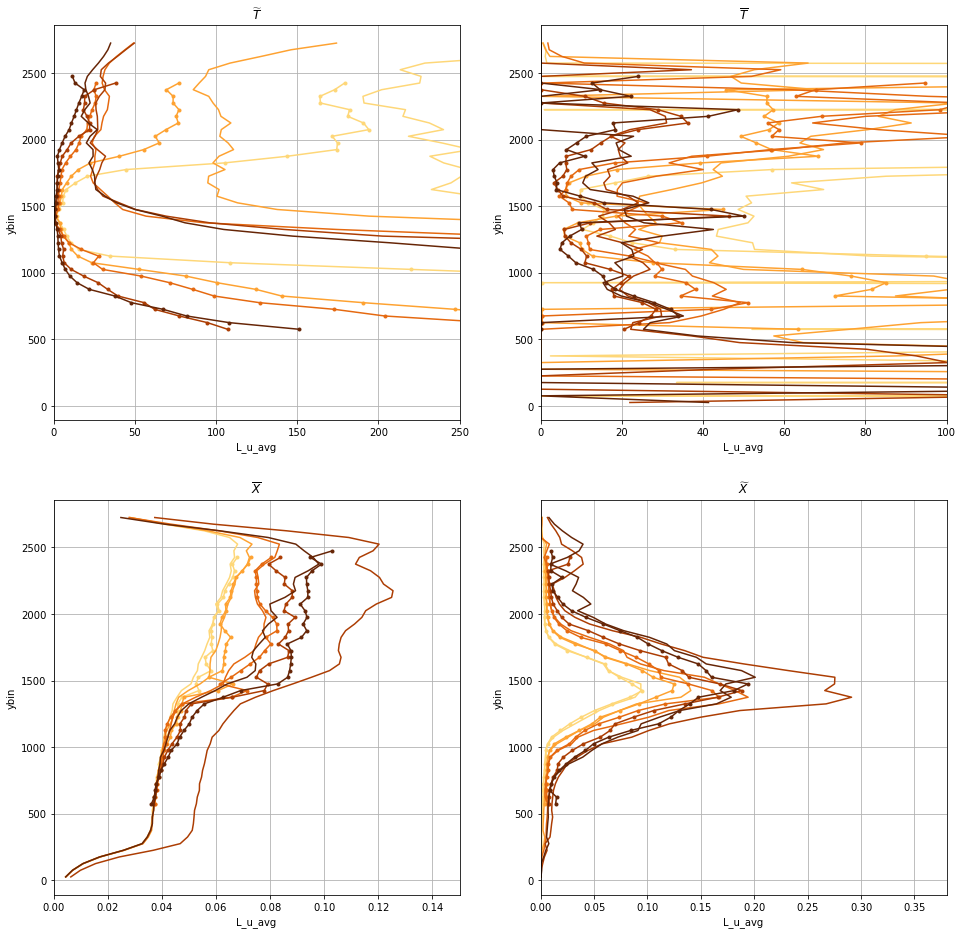

In [27]:
fig,ax = plt.subplots(2,2,figsize=(16,16))
for i,d in enumerate(ds80):
    file = sorted(glob(path+'wp*'))[i]
    wp = file[-1]
    #d['Uprime'].plot(ax=ax[0,0],y='y_rho',c=colors_Ta[i],label='wp'+wp)
    #ax[0].set_ylim(500*1e3,2800*1e3)
    #laby = ax[0].get_yticks();laby = [str(l*1e-3) for l in laby];
    #ax[0].set_yticklabels(laby)
    d['E_u_avg'].sel(param='Tt').plot(ax=ax[0,0],y='ybin',c=colors[i])
    d['L_u_avg'].sel(param='Tt').plot(ax=ax[0,0],y='ybin',c=colors[i],marker='.')
    d['E_u_avg'].sel(param='Tb').plot(ax=ax[0,1],y='ybin',c=colors[i])
    d['L_u_avg'].sel(param='Tb').plot(ax=ax[0,1],y='ybin',c=colors[i],marker='.')
    np.sqrt(d['E_u_avg'].sel(param='Xtilde')).plot(ax=ax[1,0],y='ybin',c=colors[i])
    np.sqrt(d['L_u_avg'].sel(param='Xtilde')).plot(ax=ax[1,0],y='ybin',c=colors[i],marker='.')
    np.sqrt(d['E_u_avg'].sel(param='Xbar')).plot(ax=ax[1,1],y='ybin',c=colors[i])
    np.sqrt(d['L_u_avg'].sel(param='Xbar')).plot(ax=ax[1,1],y='ybin',c=colors[i],marker='.')
    ax[0,1].set_xlim(0,100);ax[0,0].set_xlim(0,250);ax[1,1].set_xlim(0,0.38);ax[1,0].set_xlim(0,0.15);
    ax[0,1].grid();ax[0,0].grid();ax[1,1].grid();ax[1,0].grid()
    ax[0,1].set_title(r'$\overline{T}$');ax[0,0].set_title(r'$\widetilde{T}$');
    ax[1,1].set_title(r'$\widetilde{X}$');ax[1,0].set_title(r'$\overline{X}$')
    custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
    labels.append('wp'+wp)
fig.savefig('/Users/zcaspar/codes/params_fit_wps_u.eps')
#ax[0].set_xlabel(r'$\overline{U}= \overline{\sqrt{u_{jet}^2+v_{jet}^2}}$ (m.$s^{-1}$)',fontsize=fontsize);ax[0].set_ylabel(r'y(km)',fontsize=fontsize);
#ax[0].set_title('a)',fontsize=fontsize)
#ax[0].grid();ax[1].grid();ax[1].set_title('b)');ax[1].set_ylabel('')
#ax[1].legend(custom_lines, labels)
#ax[1].set_xlabel('Timescale (days)',fontsize=fontsize)
#ax[1].set_ylim(500,2800);ax[0].legend();ax[0].set_xlim(0,0.55);ax[1].set_xlim(0,50)
#ax[1].axvspan(0, 1, facecolor='0.2', alpha=0.5)

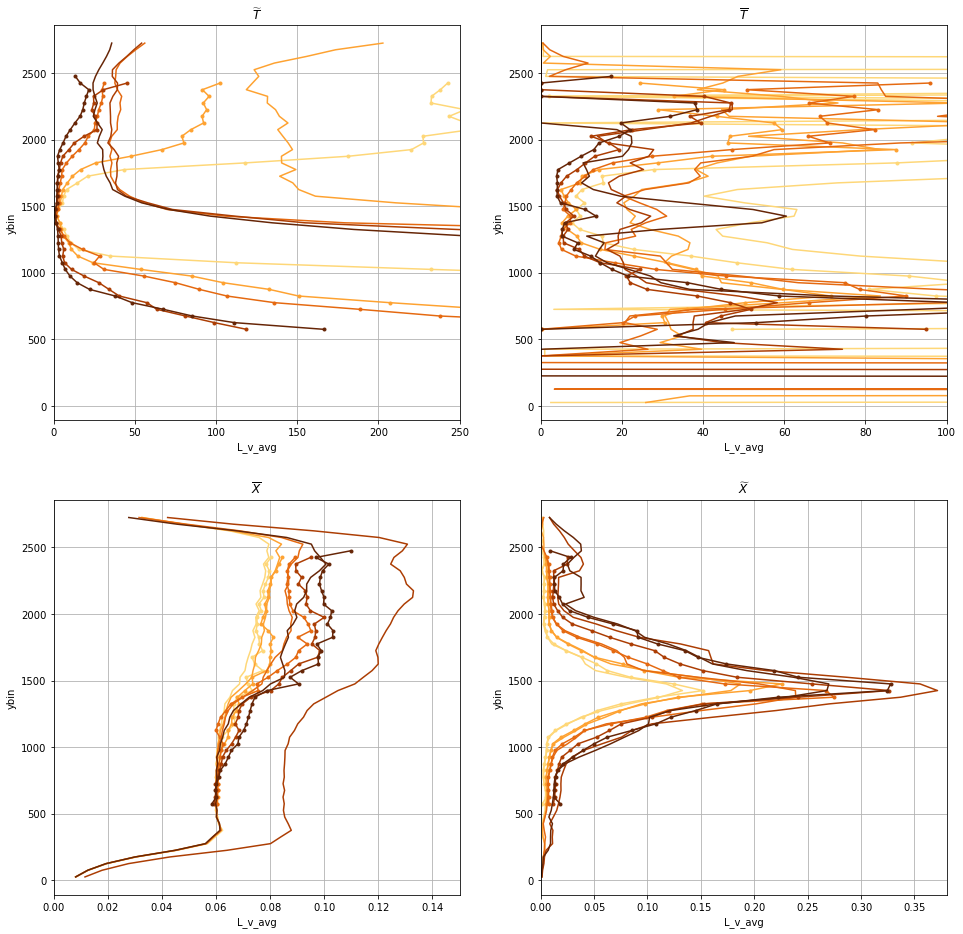

In [26]:
fig,ax = plt.subplots(2,2,figsize=(16,16))
for i,d in enumerate(ds80):
    file = sorted(glob(path+'wp*'))[i]
    wp = file[-1]
    #d['Uprime'].plot(ax=ax[0,0],y='y_rho',c=colors_Ta[i],label='wp'+wp)
    #ax[0].set_ylim(500*1e3,2800*1e3)
    #laby = ax[0].get_yticks();laby = [str(l*1e-3) for l in laby];
    #ax[0].set_yticklabels(laby)
    d['E_v_avg'].sel(param='Tt').plot(ax=ax[0,0],y='ybin',c=colors[i])
    d['L_v_avg'].sel(param='Tt').plot(ax=ax[0,0],y='ybin',c=colors[i],marker='.')
    d['E_v_avg'].sel(param='Tb').plot(ax=ax[0,1],y='ybin',c=colors[i])
    d['L_v_avg'].sel(param='Tb').plot(ax=ax[0,1],y='ybin',c=colors[i],marker='.')
    np.sqrt(d['E_v_avg'].sel(param='Xtilde')).plot(ax=ax[1,0],y='ybin',c=colors[i])
    np.sqrt(d['L_v_avg'].sel(param='Xtilde')).plot(ax=ax[1,0],y='ybin',c=colors[i],marker='.')
    np.sqrt(d['E_v_avg'].sel(param='Xbar')).plot(ax=ax[1,1],y='ybin',c=colors[i])
    np.sqrt(d['L_v_avg'].sel(param='Xbar')).plot(ax=ax[1,1],y='ybin',c=colors[i],marker='.')
    ax[0,1].set_xlim(0,100);ax[0,0].set_xlim(0,250);ax[1,1].set_xlim(0,0.38);ax[1,0].set_xlim(0,0.15);
    ax[0,1].grid();ax[0,0].grid();ax[1,1].grid();ax[1,0].grid()
    ax[0,1].set_title(r'$\overline{T}$');ax[0,0].set_title(r'$\widetilde{T}$');
    ax[1,1].set_title(r'$\widetilde{X}$');ax[1,0].set_title(r'$\overline{X}$')
    custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
    labels.append('wp'+wp)
fig.savefig('/Users/zcaspar/codes/params_fit_wps_v.eps')
#ax[0].set_xlabel(r'$\overline{U}= \overline{\sqrt{u_{jet}^2+v_{jet}^2}}$ (m.$s^{-1}$)',fontsize=fontsize);ax[0].set_ylabel(r'y(km)',fontsize=fontsize);
#ax[0].set_title('a)',fontsize=fontsize)
#ax[0].grid();ax[1].grid();ax[1].set_title('b)');ax[1].set_ylabel('')
#ax[1].legend(custom_lines, labels)
#ax[1].set_xlabel('Timescale (days)',fontsize=fontsize)
#ax[1].set_ylim(500,2800);ax[0].legend();ax[0].set_xlim(0,0.55);ax[1].set_xlim(0,50)
#ax[1].axvspan(0, 1, facecolor='0.2', alpha=0.5)

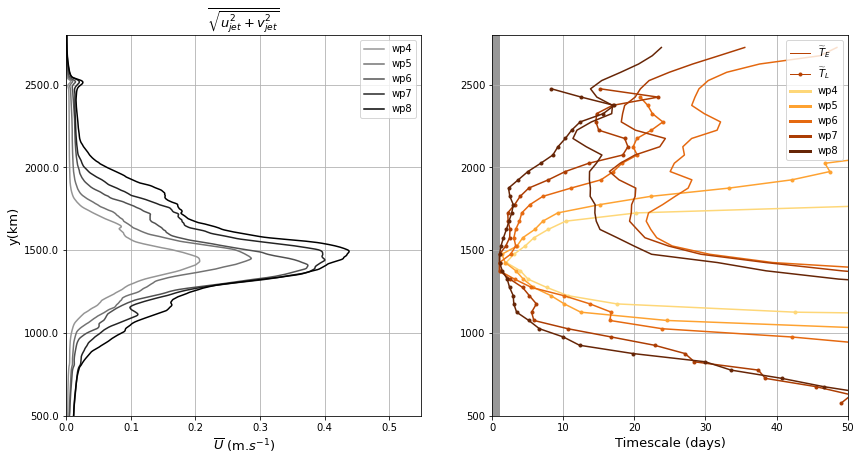

In [6]:
fontsize = 13
number = len(ds80)
cmap = plt.get_cmap('YlOrBr')
colors = [cmap(i) for i in np.linspace(0.3, 1, number)]
custom_lines = [
                Line2D([0], [0], color=cmap(.8), lw=1),
                Line2D([0], [0], color=cmap(.8), lw=1,marker='.')
                ]
labels=[r'$\widetilde{T}_E$', r'$\widetilde{T}_L$']
fig,ax = plt.subplots(1,2,figsize=(14,7))
for i,d in enumerate(ds40):
    file = sorted(glob(path+'wp*'))[i]
    wp = file[-1]
    d['Uprime'].plot(ax=ax[0],y='y_rho',c=colors_Ta[i],label='wp'+wp)
    ax[0].set_ylim(500*1e3,2800*1e3)
    laby = ax[0].get_yticks();laby = [str(l*1e-3) for l in laby];
    ax[0].set_yticklabels(laby)
    d['E_u_avg'].sel(param='Tt').plot(ax=ax[1],y='ybin',c=colors[i])
    d['L_u_avg'].sel(param='Tt').plot(ax=ax[1],y='ybin',c=colors[i],marker='.')
    custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
    labels.append('wp'+wp)
ax[0].set_xlabel(r'$\overline{U}$ (m.$s^{-1}$)',fontsize=fontsize);ax[0].set_ylabel(r'y(km)',fontsize=fontsize);
ax[0].set_title(r'$\overline{\sqrt{u_{jet}^2+v_{jet}^2}}$',fontsize=fontsize)
ax[0].grid();ax[1].grid();ax[1].set_title('');ax[1].set_ylabel('')
ax[1].legend(custom_lines, labels)
ax[1].set_xlabel('Timescale (days)',fontsize=fontsize)
ax[1].set_ylim(500,2800);ax[0].legend();ax[0].set_xlim(0,0.55);ax[1].set_xlim(0,50)
ax[1].axvspan(0, 1, facecolor='0.2', alpha=0.5)

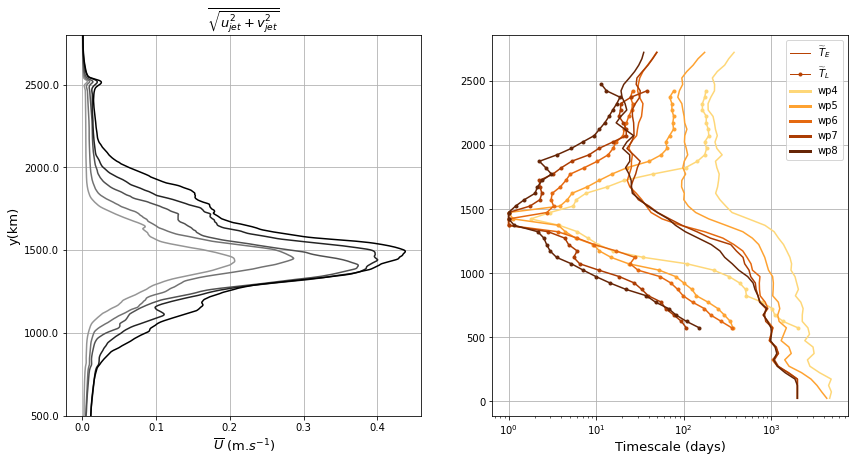

In [7]:
fontsize = 13
number = len(ds80)
cmap = plt.get_cmap('YlOrBr')
colors = [cmap(i) for i in np.linspace(0.3, 1, number)]
custom_lines = [
                Line2D([0], [0], color=cmap(.8), lw=1),
                Line2D([0], [0], color=cmap(.8), lw=1,marker='.')
                ]
labels=[r'$\widetilde{T}_E$', r'$\widetilde{T}_L$']
fig,ax = plt.subplots(1,2,figsize=(14,7))
for i,d in enumerate(ds80):
    file = sorted(glob(path+'wp*'))[i]
    wp = file[-1]
    d['Uprime'].plot(ax=ax[0],y='y_rho',c=colors_Ta[i],label='wp'+wp)
    ax[0].set_ylim(500*1e3,2800*1e3)
    laby = ax[0].get_yticks();laby = [str(l*1e-3) for l in laby];
    ax[0].set_yticklabels(laby)
    d['E_u_avg'].sel(param='Tt').plot(ax=ax[1],y='ybin',c=colors[i])
    d['L_u_avg'].sel(param='Tt').plot(ax=ax[1],y='ybin',c=colors[i],marker='.')
    custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
    labels.append('wp'+wp)
ax[0].set_xlabel(r'$\overline{U}$ (m.$s^{-1}$)',fontsize=fontsize);ax[0].set_ylabel(r'y(km)',fontsize=fontsize);
ax[0].set_title(r'$\overline{\sqrt{u_{jet}^2+v_{jet}^2}}$',fontsize=fontsize)
ax[0].grid();ax[1].grid();ax[1].set_title('');ax[1].set_ylabel('')
ax[1].legend(custom_lines, labels)
ax[1].set_xlabel('Timescale (days)',fontsize=fontsize)
#ax[1].set_ylim(500,2800);ax[0].legend();ax[0].set_xlim(0,0.55);ax[1].set_xlim(0,50)
#ax[1].axvspan(0, 1, facecolor='0.2', alpha=0.5)
ax[1].set_xscale('log')

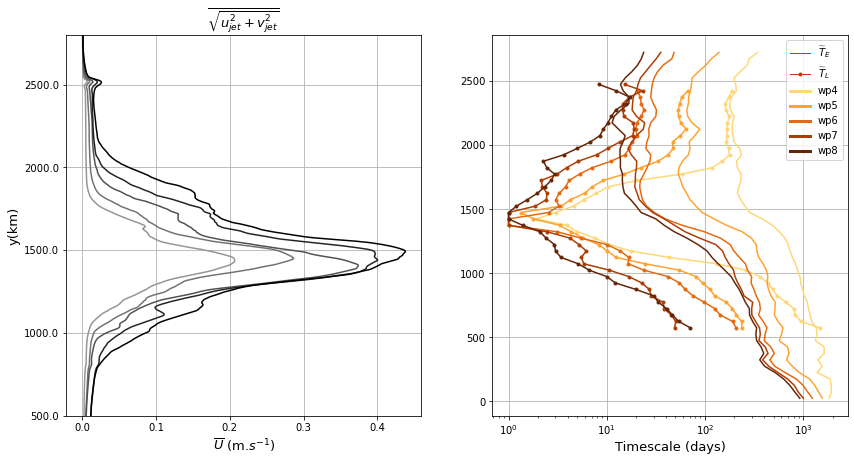

In [8]:
fontsize = 13
number = len(ds40)
cmap = plt.get_cmap('YlOrBr')
colors = [cmap(i) for i in np.linspace(0.3, 1, number)]
custom_lines = [
                Line2D([0], [0], color=cmap(.8), lw=1),
                Line2D([0], [0], color=cmap(.8), lw=1,marker='.')
                ]
labels=[r'$\widetilde{T}_E$', r'$\widetilde{T}_L$']
fig,ax = plt.subplots(1,2,figsize=(14,7))
for i,d in enumerate(ds40):
    file = sorted(glob(path+'wp*'))[i]
    wp = file[-1]
    d['Uprime'].plot(ax=ax[0],y='y_rho',c=colors_Ta[i],label='wp'+wp)
    ax[0].set_ylim(500*1e3,2800*1e3)
    laby = ax[0].get_yticks();laby = [str(l*1e-3) for l in laby];
    ax[0].set_yticklabels(laby)
    d['E_u_avg'].sel(param='Tt').plot(ax=ax[1],y='ybin',c=colors[i])
    d['L_u_avg'].sel(param='Tt').plot(ax=ax[1],y='ybin',c=colors[i],marker='.')
    custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
    labels.append('wp'+wp)
ax[0].set_xlabel(r'$\overline{U}$ (m.$s^{-1}$)',fontsize=fontsize);ax[0].set_ylabel(r'y(km)',fontsize=fontsize);
ax[0].set_title(r'$\overline{\sqrt{u_{jet}^2+v_{jet}^2}}$',fontsize=fontsize)
ax[0].grid();ax[1].grid();ax[1].set_title('');ax[1].set_ylabel('')
ax[1].legend(custom_lines, labels)
ax[1].set_xlabel('Timescale (days)',fontsize=fontsize)
#ax[1].set_ylim(500,2800);ax[0].legend();ax[0].set_xlim(0,0.55);ax[1].set_xlim(0,50)
#ax[1].axvspan(0, 1, facecolor='0.2', alpha=0.5)
ax[1].set_xscale('log')

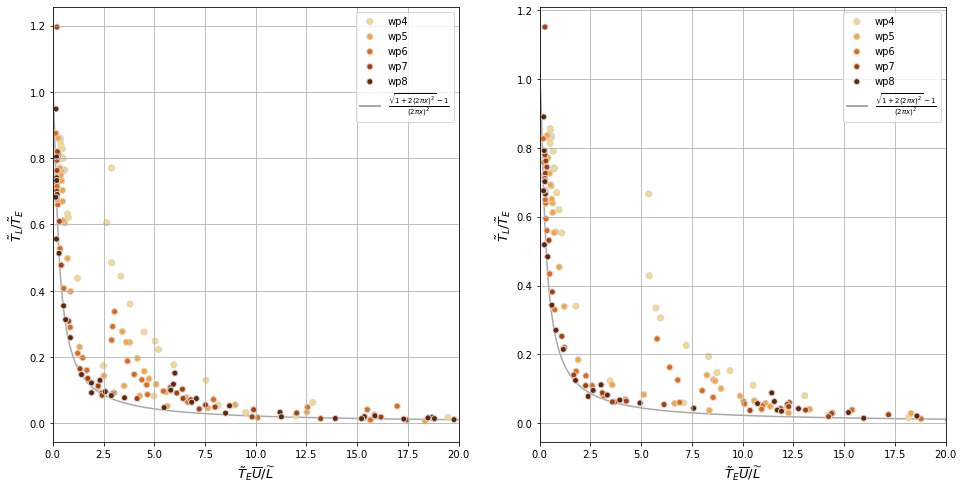

In [41]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    for i,d,c in zip(range(len(ds80)),ds80,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = d[V[0]].sel(param='Tt')/d['Ta']
        y = d[V[1]].sel(param='Tt')/d[V[0]].sel(param='Tt')
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        c = np.full((y.size,4),c)
        ax.scatter(x,y,label= 'wp'+wp,c=c,edgecolor='lightgrey')
        #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
        #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
        #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    xx = np.linspace(x.min(),x.max(),1000)
    ax.plot(xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',zorder=-1)
    #    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
    #labels.append(r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
    ax.grid()
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)],labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$'])
    ax.set_xlabel(r'$\tilde{T}_E\overline{U}/\widetilde{L}$',fontsize=fontsize)
    ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)
    ax.set_xlim(0,20)
#plt.savefig('/Users/zcaspar/codes/Figures/Synthesis/TlTe_TaTe.pdf')

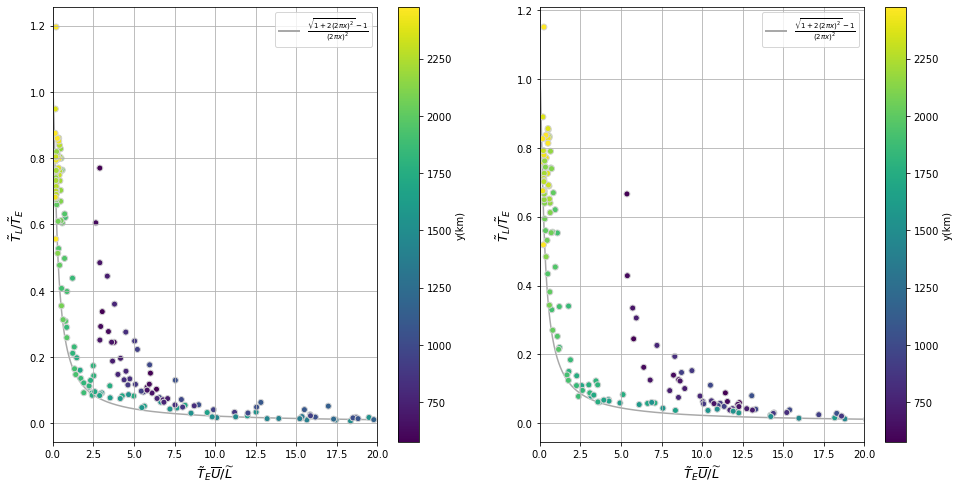

In [40]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    for i,d,c in zip(range(len(ds80)),ds80,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = d[V[0]].sel(param='Tt')/d['Ta']
        y = d[V[1]].sel(param='Tt')/d[V[0]].sel(param='Tt')
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        c = x.ybin.values
        cs = ax.scatter(x,y,c=c,edgecolor='lightgrey')
        
        #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
        #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
        #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    xx = np.linspace(x.min(),x.max(),1000)
    ax.plot(xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',zorder=-1)#    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
    #labels.append(r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
    ax.grid()
    plt.colorbar(cs,ax=ax,label='y(km)')
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)],labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$'])
    ax.set_xlabel(r'$\tilde{T}_E\overline{U}/\widetilde{L}$',fontsize=fontsize)
    ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)
    ax.set_xlim(0,20)
#plt.savefig('/Users/zcaspar/codes/Figures/Synthesis/TlTe_TaTe.pdf')

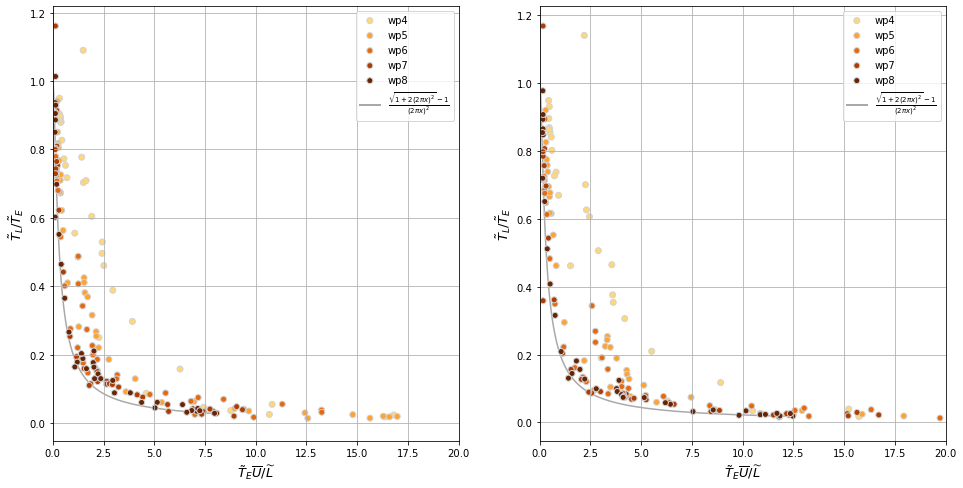

In [39]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    for i,d,c in zip(range(len(ds40)),ds40,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = d[V[0]].sel(param='Tt')/d['Ta']
        y = d[V[1]].sel(param='Tt')/d[V[0]].sel(param='Tt')
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        c = np.full((y.size,4),c)
        ax.scatter(x,y,label= 'wp'+wp,c=c,edgecolor='lightgrey')
        #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
        #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
        #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    xx = np.linspace(x.min(),x.max(),1000)
    ax.plot(xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',zorder=-1)
#    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
    #labels.append(r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
    ax.grid()
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)],labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$'])
    ax.set_xlabel(r'$\tilde{T}_E\overline{U}/\widetilde{L}$',fontsize=fontsize)
    ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)
    ax.set_xlim(0,20)
plt.savefig('/Users/zcaspar/codes/Figures/Synthesis/TlTe_TaTe.pdf')

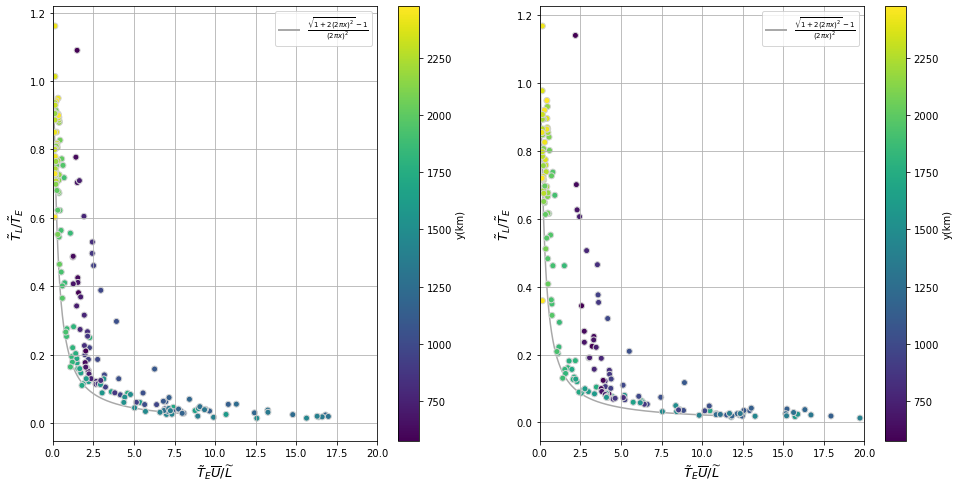

In [38]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    for i,d,c in zip(range(len(ds40)),ds40,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = d[V[0]].sel(param='Tt')/d['Ta']
        y = d[V[1]].sel(param='Tt')/d[V[0]].sel(param='Tt')
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        c = x.ybin.values
        cs = ax.scatter(x,y,c=c,edgecolor='lightgrey')
        
        #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
        #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
        #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    xx = np.linspace(x.min(),x.max(),1000)
    ax.plot(xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',zorder=-1)
    #    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
    #labels.append(r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
    ax.grid()
    plt.colorbar(cs,ax=ax,label='y(km)')
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)],labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$'])
    ax.set_xlabel(r'$\tilde{T}_E\overline{U}/\widetilde{L}$',fontsize=fontsize)
    ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)
    ax.set_xlim(0,20)

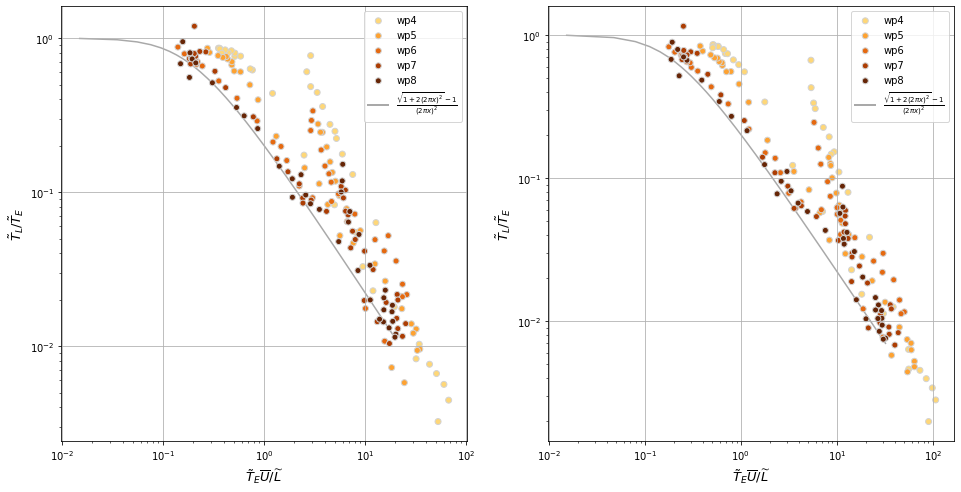

In [34]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    for i,d,c in zip(range(len(ds80)),ds80,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = d[V[0]].sel(param='Tt')/d['Ta']
        y = d[V[1]].sel(param='Tt')/d[V[0]].sel(param='Tt')
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        c = np.full((y.size,4),c)
        ax.scatter(x,y,label= 'wp'+wp,c=c,edgecolor='lightgrey')
        #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
        #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
        #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    xx = np.linspace(x.min(),x.max(),1000)
    ax.plot(xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',zorder=-1)
    #    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
    #labels.append(r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
    ax.grid()
    ax.set_xscale('log');ax.set_yscale('log')
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)],labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$'])
    ax.set_xlabel(r'$\tilde{T}_E\overline{U}/\widetilde{L}$',fontsize=fontsize)
    ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)
   # ax.set_xlim(0,20)

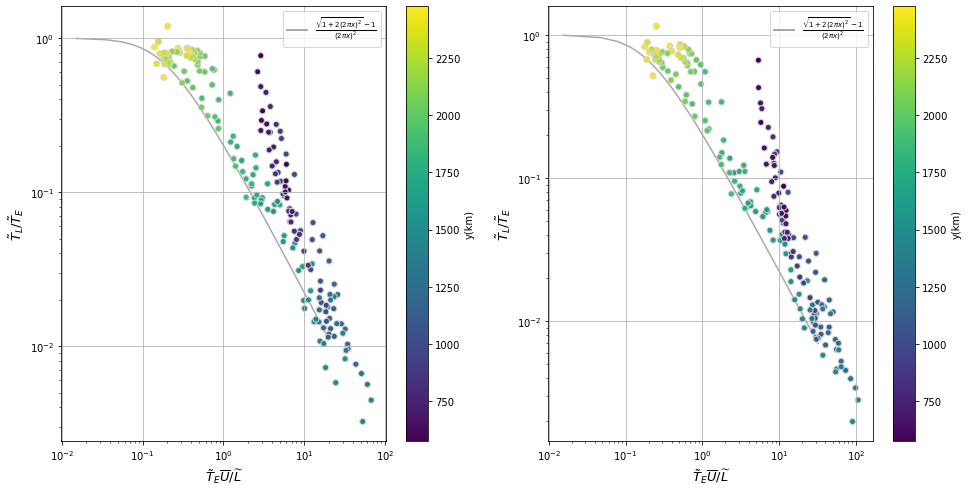

In [35]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    for i,d,c in zip(range(len(ds80)),ds80,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = d[V[0]].sel(param='Tt')/d['Ta']
        y = d[V[1]].sel(param='Tt')/d[V[0]].sel(param='Tt')
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        c = x.ybin.values
        cs = ax.scatter(x,y,c=c,edgecolor='lightgrey')
        #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
        #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
        #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    xx = np.linspace(x.min(),x.max(),1000)
    ax.plot(xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',zorder=-1)
    #    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
    #labels.append(r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
    ax.grid()
    plt.colorbar(cs,ax=ax,label='y(km)')
    ax.set_xscale('log');ax.set_yscale('log')
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)],labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$'])
    ax.set_xlabel(r'$\tilde{T}_E\overline{U}/\widetilde{L}$',fontsize=fontsize)
    ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)

IndexError: list index out of range

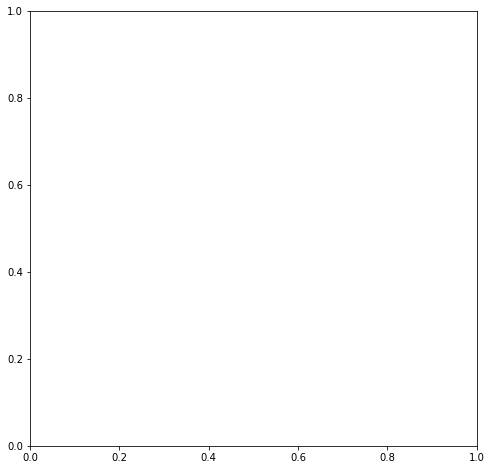

In [5]:
markers=['s','o','d','v','x']
label=[]
#cmap = plt.get_cmap('YlOrBr')
#colors = [cmap(i) for i in np.linspace(0.3, 1, number)]
custom_lines = [Line2D([0], [0], color='grey', lw=1,marker=m) for m in markers]
fig,ax = plt.subplots(figsize=(8,8))
for i,d,m in zip(range(len(ds80)),ds80,markers):
    for V in [['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]:
        x = d[V[0]].sel(param='Tt')/d['Ta']
        y = d[V[1]].sel(param='Tt')/d[V[0]].sel(param='Tt')
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        c = x.ybin.values
        cs = ax.scatter(x,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r')        
        #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
        #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
        #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    label.append('wp%s'%wp)
xx = np.linspace(x.min(),x.max(),1000)
ax.plot(xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',zorder=-1)
    #    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
    #labels.append(r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
ax.grid()
plt.colorbar(cs,ax=ax,label='y(km)')
ax.set_xscale('log');ax.set_yscale('log')
handles,labels = ax.get_legend_handles_labels()
ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)]+custom_lines,labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$']+label)
ax.set_xlabel(r'$\tilde{T}_E\overline{U}/\widetilde{L}$',fontsize=fontsize)
ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)

### Plots for T=40days using the total velocity, u and v

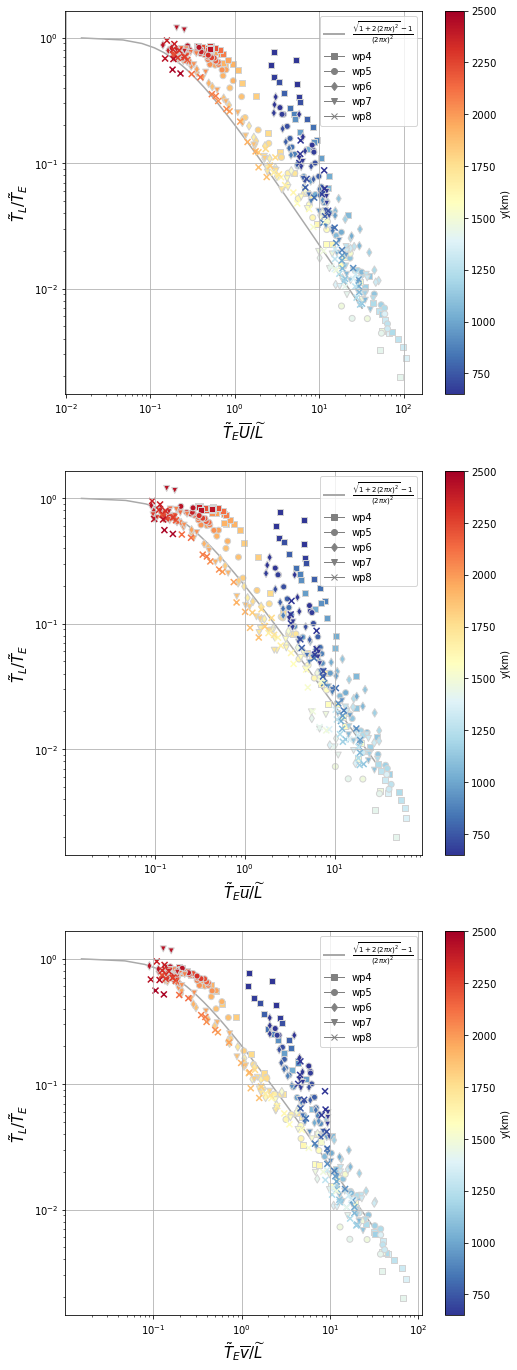

In [6]:
markers=['s','o','d','v','x']
label=[]
fontsize=15
#cmap = plt.get_cmap('YlOrBr')
#colors = [cmap(i) for i in np.linspace(0.3, 1, number)]
custom_lines = [Line2D([0], [0], color='grey', lw=1,marker=m) for m in markers]
fig,axs = plt.subplots(3,1,figsize=(8,24))
for i,d,m in zip(range(len(ds80)),ds80,markers):
    for V in [['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]:
        x = d[V[0]].sel(param='Tt')/d['Ta']
        x1 = d[V[0]].sel(param='Tt')/d['Ta_u'].isel(s_rho=-1)
        x2 = d[V[0]].sel(param='Tt')/d['Ta_v'].isel(s_rho=-1)
        y = d[V[1]].sel(param='Tt')/d[V[0]].sel(param='Tt')
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        c = x.ybin.values
        cs = axs[0].scatter(x,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        cs1 = axs[1].scatter(x1,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        cs2 = axs[2].scatter(x2,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500) 
    
        #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
        #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
        #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    label.append('wp%s'%wp)
plt.colorbar(cs,ax=axs[0],label='y(km)')
plt.colorbar(cs1,ax=axs[1],label='y(km)')
plt.colorbar(cs2,ax=axs[2],label='y(km)')
xx = np.linspace(x.min(),x.max(),1000)
for V,ax in zip(['\overline{U}','\overline{u}','\overline{v}'],axs):
    ax.plot(xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',zorder=-1)
    #    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
    #labels.append(r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
    ax.grid()
    
    ax.set_xscale('log');ax.set_yscale('log')
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)]+custom_lines,labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$']+label)
    ax.set_xlabel(r'$\tilde{T}_E%s/\widetilde{L}$'%V,fontsize=fontsize)
    ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)

### Same figures than previously but without saturated data

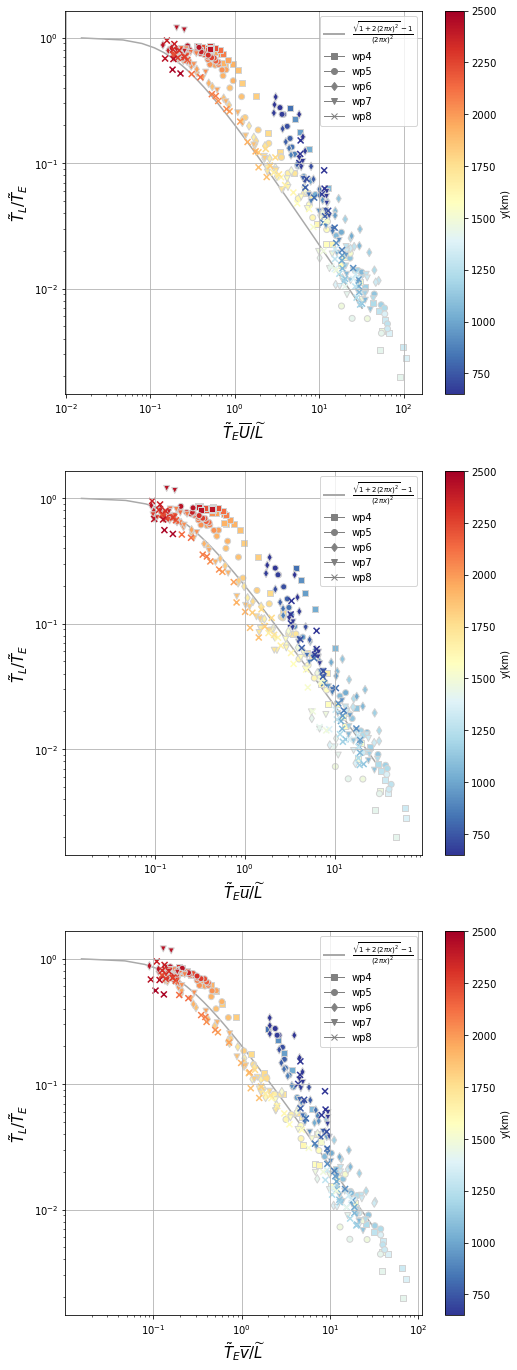

In [7]:
fig,axs = plt.subplots(3,1,figsize=(8,24))
for i,d,m in zip(range(len(ds80)),ds80,markers):
    for V in [['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]:
        x = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta'].where(d[V[0]].sel(param='Tt')<2000,drop=True)
        x1 = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta_u'].isel(s_rho=-1).where(d[V[0]].sel(param='Tt')<2000,drop=True)
        x2 = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta_v'].isel(s_rho=-1).where(d[V[0]].sel(param='Tt')<2000,drop=True)
        y = d[V[1]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        c = x.ybin.values
        cs = axs[0].scatter(x,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        cs1 = axs[1].scatter(x1,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        cs2 = axs[2].scatter(x2,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
        #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
        #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    label.append('wp%s'%wp)
plt.colorbar(cs,ax=axs[0],label='y(km)')
plt.colorbar(cs1,ax=axs[1],label='y(km)')
plt.colorbar(cs2,ax=axs[2],label='y(km)')
xx = np.linspace(x.min(),x.max(),1000)
for V,ax in zip(['\overline{U}','\overline{u}','\overline{v}'],axs):
    ax.plot(xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',zorder=-1)
    #    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
    #labels.append(r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
    ax.grid()
    ax.set_xscale('log');ax.set_yscale('log')
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)]+custom_lines,labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$']+label)
    ax.set_xlabel(r'$\tilde{T}_E%s/\widetilde{L}$'%V,fontsize=fontsize)
    ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)

### Courbes limites (tous les points compris)

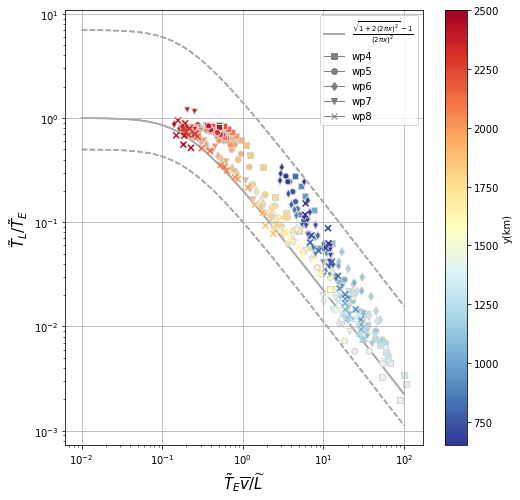

In [25]:
fig,ax = plt.subplots(figsize=(8,8))
for i,d,m in zip(range(len(ds80)),ds80,markers):
    for V in [['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]:
        x = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta'].where(d[V[0]].sel(param='Tt')<2000,drop=True)
        x1 = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta_u'].isel(s_rho=-1).where(d[V[0]].sel(param='Tt')<2000,drop=True)
        x2 = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta_v'].isel(s_rho=-1).where(d[V[0]].sel(param='Tt')<2000,drop=True)
        y = d[V[1]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        c = x.ybin.values
        cs = ax.scatter(x,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        #cs1 = axs[1].scatter(x1,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        #cs2 = axs[2].scatter(x2,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
        #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
        #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    label.append('wp%s'%wp)
plt.colorbar(cs,ax=ax,label='y(km)')
xx = np.linspace(0.01,100,10000)
for V in ['\overline{U}','\overline{u}','\overline{v}']:
    ax.plot(xx,0.5*(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',linestyle='--',zorder=-1)
    ax.plot(xx,7*(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',linestyle='--',zorder=-1)
    ax.plot(xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',zorder=-1)
    #    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
    #labels.append(r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
    ax.grid()
    ax.set_xscale('log');ax.set_yscale('log')
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)]+custom_lines,labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$']+label)
    ax.set_xlabel(r'$\tilde{T}_E%s/\widetilde{L}$'%V,fontsize=fontsize)
    ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)

In [13]:
print(xx_low,xx)
def myfunc(x):
    return (np.sqrt(1+2*(2*np.pi*x)**2)-1)/((2*np.pi*x)**2)

[5.0000e-03 1.0000e-02 1.5000e-02 ... 4.9990e+01 4.9995e+01 5.0000e+01] [1.000e-02 2.000e-02 3.000e-02 ... 9.998e+01 9.999e+01 1.000e+02]


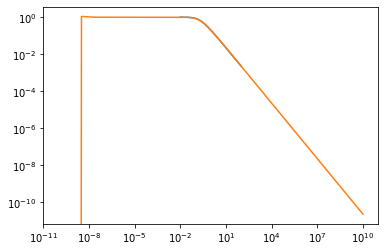

In [21]:
plt.loglog(xx,myfunc(xx))
#plt.loglog(xx**5,myfunc(xx**5))

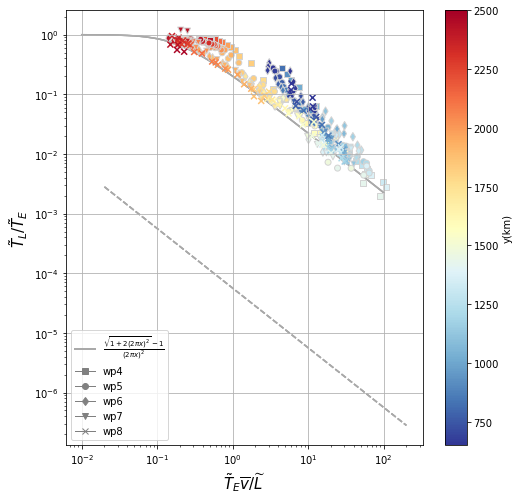

In [24]:
fig,ax = plt.subplots(figsize=(8,8))
for i,d,m in zip(range(len(ds80)),ds80,markers):
    for V in [['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]:
        x = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta'].where(d[V[0]].sel(param='Tt')<2000,drop=True)
        x1 = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta_u'].isel(s_rho=-1).where(d[V[0]].sel(param='Tt')<2000,drop=True)
        x2 = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta_v'].isel(s_rho=-1).where(d[V[0]].sel(param='Tt')<2000,drop=True)
        y = d[V[1]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        c = x.ybin.values
        cs = ax.scatter(x,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        #cs1 = axs[1].scatter(x1,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        #cs2 = axs[2].scatter(x2,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
        #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
        #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    label.append('wp%s'%wp)
plt.colorbar(cs,ax=ax,label='y(km)')
xx = np.linspace(0.01,100,10000)
xx_low = 0.5*xx
xx_upp = 8000*xx
for V in ['\overline{U}','\overline{u}','\overline{v}']:
#    ax.plot(xx_low,(np.sqrt(1+2*(2*np.pi*xx_low)**2)-1)/((2*np.pi*xx_low)**2),c='darkgrey',linestyle='--',zorder=-1)
    ax.plot(2*xx,(np.sqrt(1+2*(2*np.pi*xx_upp)**2)-1)/((2*np.pi*xx_upp)**2),c='darkgrey',linestyle='--',zorder=-1)
    ax.plot(xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',zorder=-1)
    #    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
    #labels.append(r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
    ax.grid()
    ax.set_xscale('log');ax.set_yscale('log')
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)]+custom_lines,labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$']+label)
    ax.set_xlabel(r'$\tilde{T}_E%s/\widetilde{L}$'%V,fontsize=fontsize)
    ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)

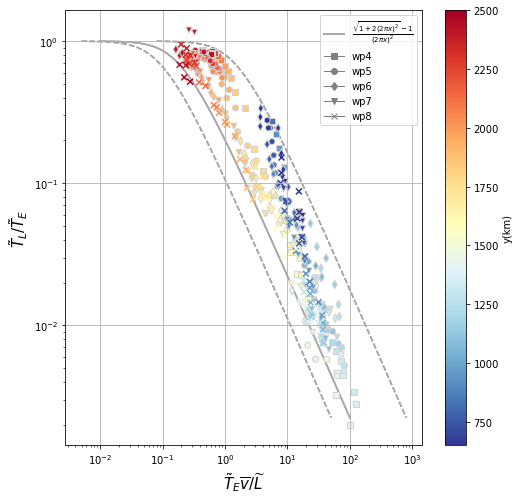

In [15]:
fig,ax = plt.subplots(figsize=(8,8))
for i,d,m in zip(range(len(ds80)),ds80,markers):
    for V in [['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]:
        x = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta_rms'].where(d[V[0]].sel(param='Tt')<2000,drop=True)
        x1 = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta_u'].isel(s_rho=-1).where(d[V[0]].sel(param='Tt')<2000,drop=True)
        x2 = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta_v'].isel(s_rho=-1).where(d[V[0]].sel(param='Tt')<2000,drop=True)
        y = d[V[1]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        c = x.ybin.values
        cs = ax.scatter(x,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        #cs1 = axs[1].scatter(x1,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        #cs2 = axs[2].scatter(x2,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
        #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
        #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    label.append('wp%s'%wp)
plt.colorbar(cs,ax=ax,label='y(km)')
xx = np.linspace(0.01,100,10000)
for V in ['\overline{U}','\overline{u}','\overline{v}']:
    ax.plot(0.5*xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',linestyle='--',zorder=-1)
    ax.plot(8*xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',linestyle='--',zorder=-1)
    ax.plot(xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',zorder=-1)
    #    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
    #labels.append(r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
    ax.grid()
    ax.set_xscale('log');ax.set_yscale('log')
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)]+custom_lines,labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$']+label)
    ax.set_xlabel(r'$\tilde{T}_E%s/\widetilde{L}$'%V,fontsize=fontsize)
    ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)

### Dominant terms 

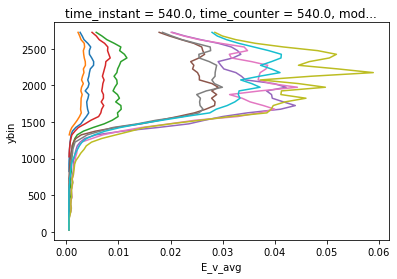

In [8]:
for i,d,m in zip(range(len(ds80)),ds80,markers):
    for V in [['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]:
        (1/d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)).plot(y='ybin')#/d['Ta_rms'].where(d[V[0]].sel(param='Tt')<2000,drop=True)

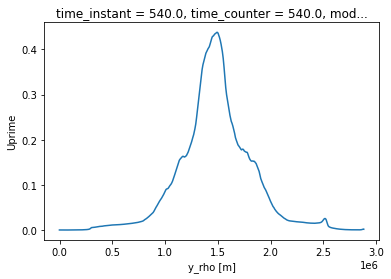

In [11]:
d['Uprime'].plot()

### T=20

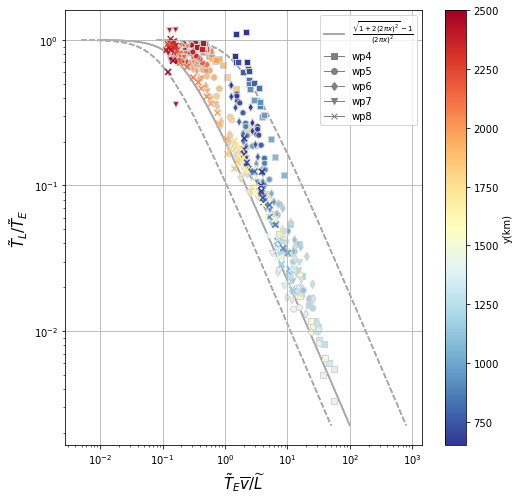

In [17]:
fig,ax = plt.subplots(figsize=(8,8))
for i,d,m in zip(range(len(ds40)),ds40,markers):
    for V in [['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]:
        x = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta'].where(d[V[0]].sel(param='Tt')<2000,drop=True)
     #   x1 = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta_u'].isel(s_rho=-1).where(d[V[0]].sel(param='Tt')<2000,drop=True)
     #   x2 = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta_v'].isel(s_rho=-1).where(d[V[0]].sel(param='Tt')<2000,drop=True)
        y = d[V[1]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        c = x.ybin.values
        cs = ax.scatter(x,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        #cs1 = axs[1].scatter(x1,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        #cs2 = axs[2].scatter(x2,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
        #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
        #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    label.append('wp%s'%wp)
plt.colorbar(cs,ax=ax,label='y(km)')
xx = np.linspace(0.01,100,10000)
for V in ['\overline{U}','\overline{u}','\overline{v}']:
    ax.plot(0.5*xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',linestyle='--',zorder=-1)
    ax.plot(8*xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',linestyle='--',zorder=-1)
    ax.plot(xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',zorder=-1)
    #    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
    #labels.append(r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
    ax.grid()
    ax.set_xscale('log');ax.set_yscale('log')
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)]+custom_lines,labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$']+label)
    ax.set_xlabel(r'$\tilde{T}_E%s/\widetilde{L}$'%V,fontsize=fontsize)
    ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)

### Tests separated simulation

In [32]:
[(d['E_u_avg'].sel(param='Tt').where(d['E_u_avg'].sel(param='Tt')<2000,drop=True)/d['Ta'].where(d['E_u_avg'].sel(param='Tt')<2000,drop=True)).min().values for d in ds80]

[array(0.02853586),
 array(0.02414098),
 array(0.00988636),
 array(0.01811568),
 array(0.01501714)]

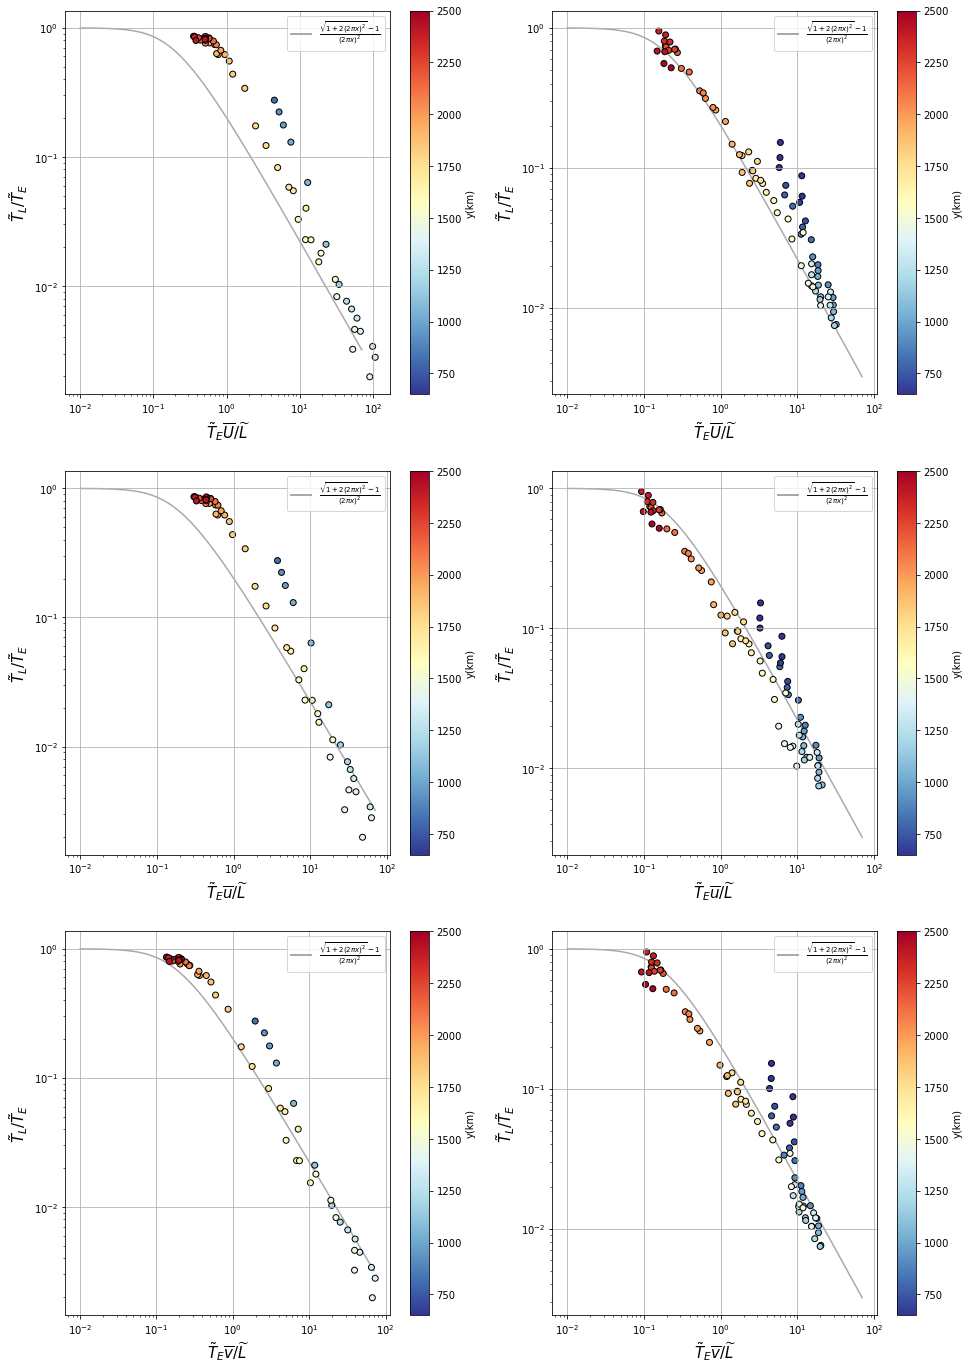

In [37]:
#Without saturated Te
xx = np.linspace(0.01,70,10000)
fig,axes = plt.subplots(3,2,figsize=(16,24))
for d,axs in zip([ds80[0],ds80[-1]],[axes[:,0],axes[:,1]]):
    for V in [['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]:
        x = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta'].where(d[V[0]].sel(param='Tt')<2000,drop=True)
        x1 = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta_u'].isel(s_rho=-1).where(d[V[0]].sel(param='Tt')<2000,drop=True)
        x2 = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta_v'].isel(s_rho=-1).where(d[V[0]].sel(param='Tt')<2000,drop=True)
        y = d[V[1]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)
        c = x.ybin.values
        cs = axs[0].scatter(x,y,c=c,edgecolors='k',marker='o',cmap='RdYlBu_r',vmin=650,vmax=2500)        
        cs1 = axs[1].scatter(x1,y,c=c,edgecolor='k',marker='o',cmap='RdYlBu_r',vmin=650,vmax=2500)        
        cs2 = axs[2].scatter(x2,y,c=c,edgecolor='k',marker='o',cmap='RdYlBu_r',vmin=650,vmax=2500)        
            #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
            #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
            #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    plt.colorbar(cs,ax=axs[0],label='y(km)')
    plt.colorbar(cs1,ax=axs[1],label='y(km)')
    plt.colorbar(cs2,ax=axs[2],label='y(km)')
    
    for V,ax in zip(['\overline{U}','\overline{u}','\overline{v}'],axs):
        ax.plot(xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',zorder=-1)
        #    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
        #labels.append(r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
        ax.grid()
        ax.set_xscale('log');ax.set_yscale('log')
        handles,labels = ax.get_legend_handles_labels()
        ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)],labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$'])
        ax.set_xlabel(r'$\tilde{T}_E%s/\widetilde{L}$'%V,fontsize=fontsize)
        ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)

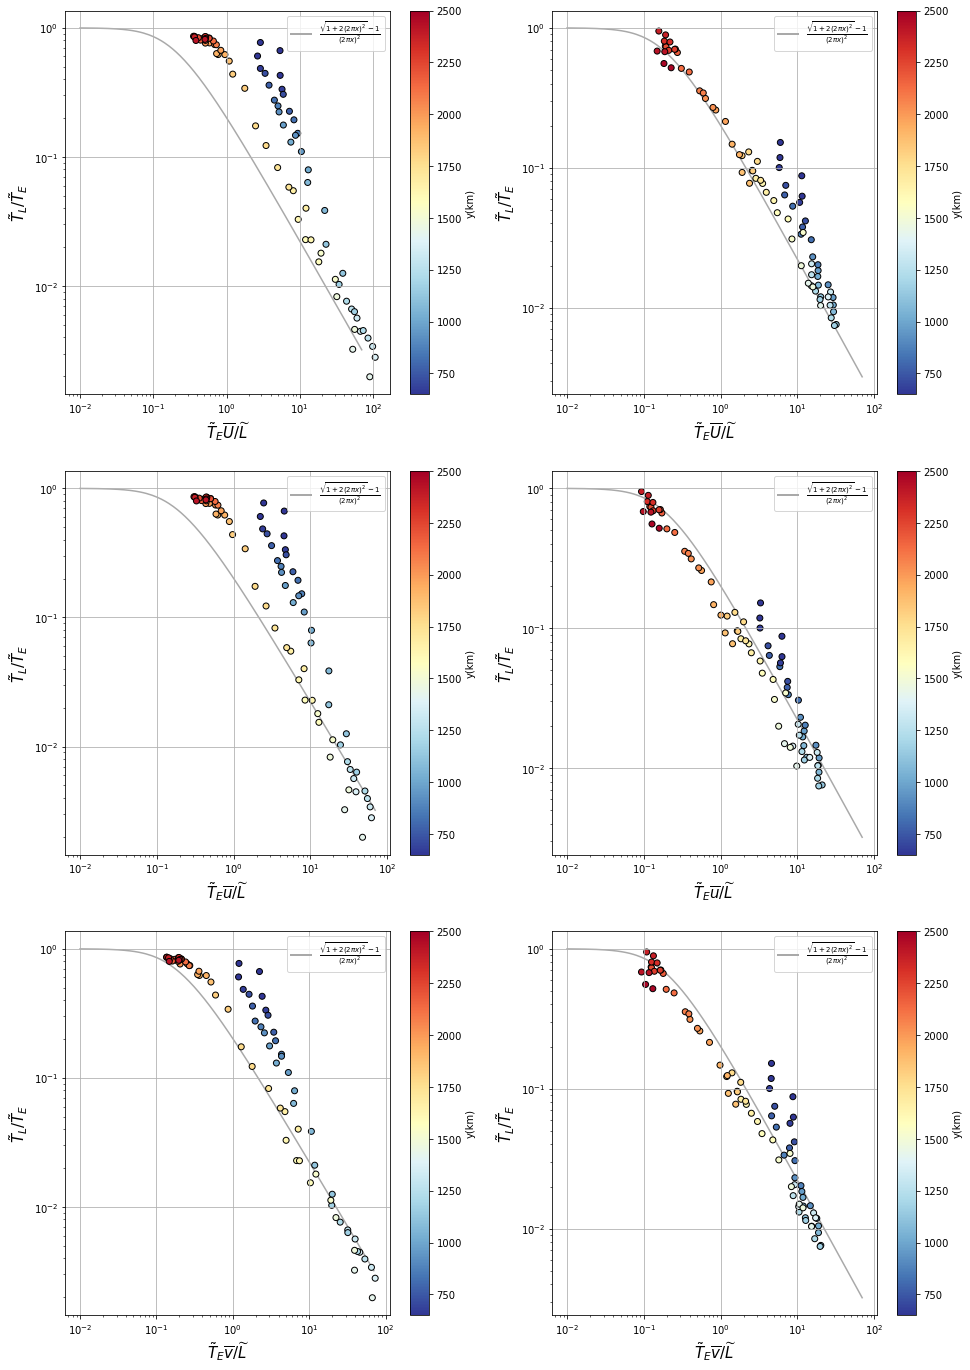

In [38]:
#With saturated Te
xx = np.linspace(0.01,70,10000)
fig,axes = plt.subplots(3,2,figsize=(16,24))
for d,axs in zip([ds80[0],ds80[-1]],[axes[:,0],axes[:,1]]):
    for V in [['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]:
        x = d[V[0]].sel(param='Tt')/d['Ta']
        x1 = d[V[0]].sel(param='Tt')/d['Ta_u'].isel(s_rho=-1)
        x2 = d[V[0]].sel(param='Tt')/d['Ta_v'].isel(s_rho=-1)
        y = d[V[1]].sel(param='Tt')/d[V[0]].sel(param='Tt')
        c = x.ybin.values
        cs = axs[0].scatter(x,y,c=c,edgecolors='k',marker='o',cmap='RdYlBu_r',vmin=650,vmax=2500)        
        cs1 = axs[1].scatter(x1,y,c=c,edgecolor='k',marker='o',cmap='RdYlBu_r',vmin=650,vmax=2500)        
        cs2 = axs[2].scatter(x2,y,c=c,edgecolor='k',marker='o',cmap='RdYlBu_r',vmin=650,vmax=2500)        
            #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
            #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
            #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    plt.colorbar(cs,ax=axs[0],label='y(km)')
    plt.colorbar(cs1,ax=axs[1],label='y(km)')
    plt.colorbar(cs2,ax=axs[2],label='y(km)')
    
    for V,ax in zip(['\overline{U}','\overline{u}','\overline{v}'],axs):
        ax.plot(xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',zorder=-1)
        #    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
        #labels.append(r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
        ax.grid()
        ax.set_xscale('log');ax.set_yscale('log')
        handles,labels = ax.get_legend_handles_labels()
        ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)],labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$'])
        ax.set_xlabel(r'$\tilde{T}_E%s/\widetilde{L}$'%V,fontsize=fontsize)
        ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)

Text(0, 0.5, '$\\tilde{T}_L/\\tilde{T}_E$')

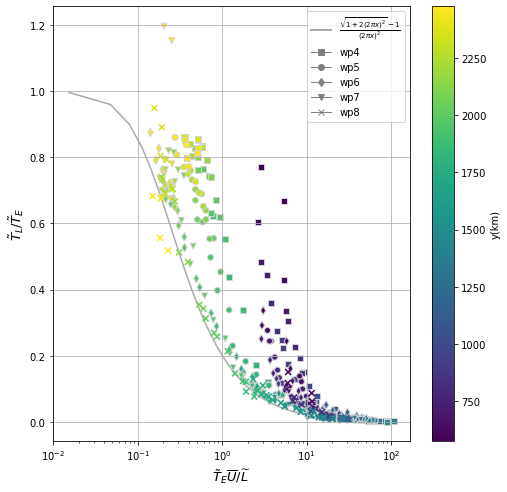

In [39]:
markers=['s','o','d','v','x']
label=[]
#cmap = plt.get_cmap('YlOrBr')
#colors = [cmap(i) for i in np.linspace(0.3, 1, number)]
custom_lines = [Line2D([0], [0], color='grey', lw=1,marker=m) for m in markers]
fig,ax = plt.subplots(figsize=(8,8))
for i,d,m in zip(range(len(ds80)),ds80,markers):
    for V in [['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]:
        x = d[V[0]].sel(param='Tt')/d['Ta']
        y = d[V[1]].sel(param='Tt')/d[V[0]].sel(param='Tt')
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        c = x.ybin.values
        cs = ax.scatter(x,y,c=c,edgecolor='lightgrey',marker=m)        
        #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
        #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
        #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    label.append('wp%s'%wp)
xx = np.linspace(x.min(),x.max(),1000)
ax.plot(xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',zorder=-1)
    #    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
    #labels.append(r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
ax.grid()
plt.colorbar(cs,ax=ax,label='y(km)')
ax.set_xscale('log')
#ax.set_xscale('log');ax.set_yscale('log')
handles,labels = ax.get_legend_handles_labels()
ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)]+custom_lines,labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$']+label)
ax.set_xlabel(r'$\tilde{T}_E\overline{U}/\widetilde{L}$',fontsize=fontsize)
ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)

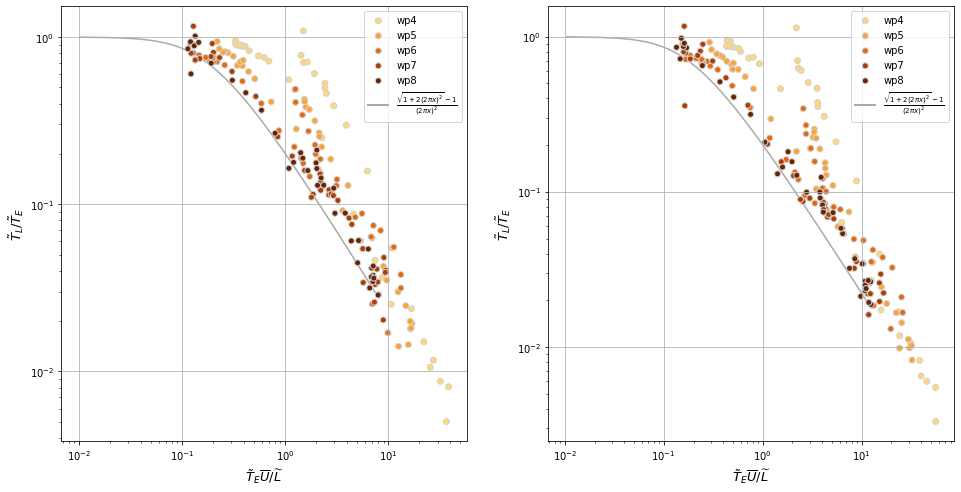

In [36]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    for i,d,c in zip(range(len(ds40)),ds40,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = d[V[0]].sel(param='Tt')/d['Ta']
        y = d[V[1]].sel(param='Tt')/d[V[0]].sel(param='Tt')
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        c = np.full((y.size,4),c)
        ax.scatter(x,y,label= 'wp'+wp,c=c,edgecolor='lightgrey')
        #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
        #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
        #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    xx = np.linspace(x.min(),x.max(),1000)
    ax.plot(xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',zorder=-1)
    ax.grid()
    ax.set_xscale('log');ax.set_yscale('log')
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)],labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$'])
    ax.set_xlabel(r'$\tilde{T}_E\overline{U}/\widetilde{L}$',fontsize=fontsize)
    ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)
   # ax.set_xlim(0,20)

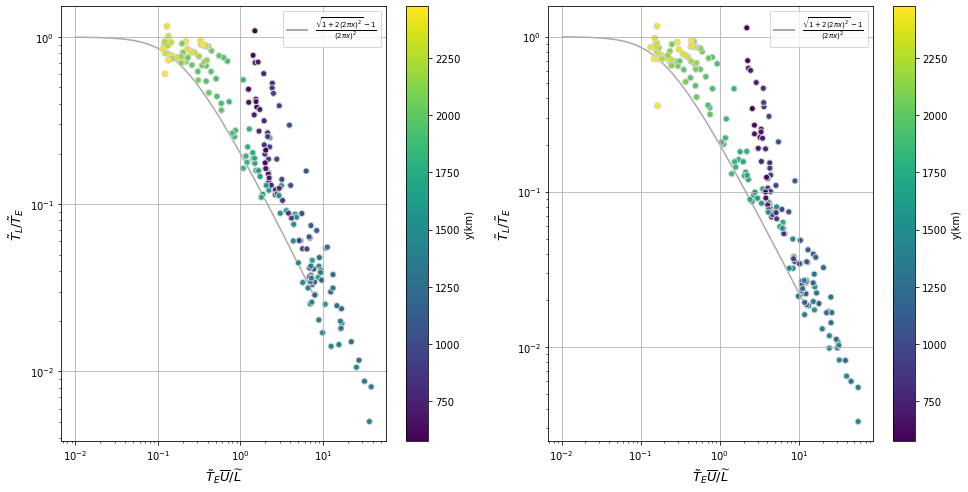

In [37]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    for i,d,c in zip(range(len(ds40)),ds40,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = d[V[0]].sel(param='Tt')/d['Ta']
        y = d[V[1]].sel(param='Tt')/d[V[0]].sel(param='Tt')
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        c = x.ybin.values
        cs = ax.scatter(x,y,c=c,edgecolor='lightgrey')
        #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
        #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
        #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    xx = np.linspace(x.min(),x.max(),1000)
    ax.plot(xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',zorder=-1)
    ax.grid()
    plt.colorbar(cs,ax=ax,label='y(km)')
    ax.set_xscale('log');ax.set_yscale('log')
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)],labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$'])
    ax.set_xlabel(r'$\tilde{T}_E\overline{U}/\widetilde{L}$',fontsize=fontsize)
    ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)

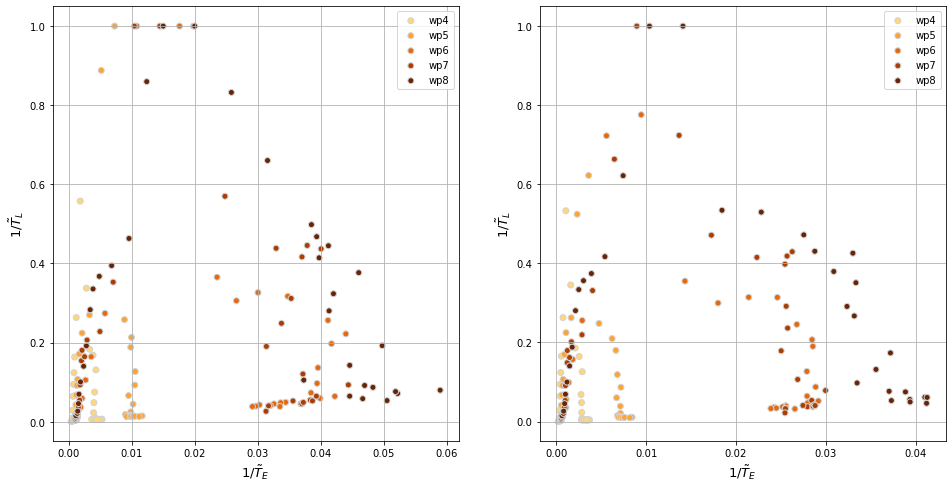

In [14]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    for i,d,c in zip(range(len(ds80)),ds80,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = 1/d[V[0]].sel(param='Tt')
        y = 1/d[V[1]].sel(param='Tt')
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        c = np.full((y.size,4),c)
        ax.scatter(x,y,label= 'wp'+wp,c=c,edgecolor='lightgrey')
    ax.legend() 
    ax.grid()
    handles,labels = ax.get_legend_handles_labels()
    ax.set_xlabel(r'1/$\tilde{T}_E$',fontsize=fontsize)
    ax.set_ylabel(r'1/$\tilde{T}_L$',fontsize=fontsize)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


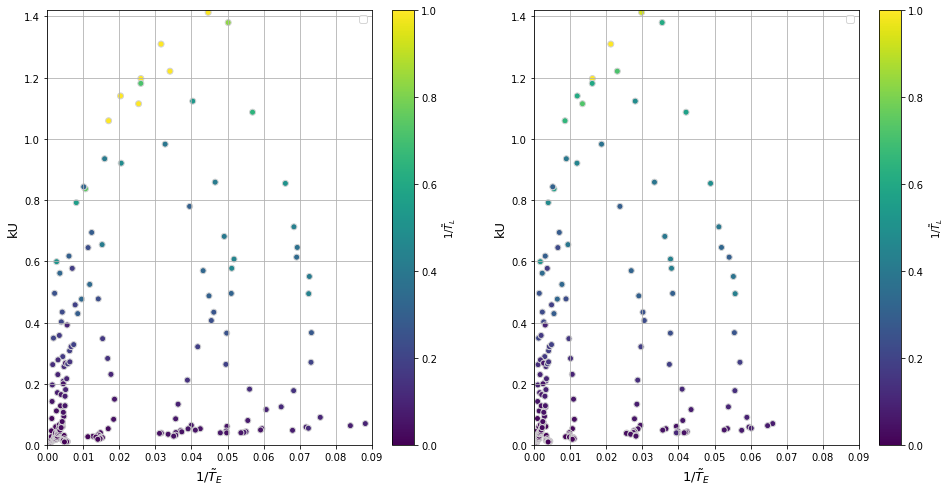

In [8]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    for i,d,c in zip(range(len(ds40)),ds40,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = 1/d[V[0]].sel(param='Tt')
        y = 2*np.pi/d['Ta']
        c = 1/d[V[1]].sel(param='Tt')
        Y,X = np.meshgrid(y,x)
        #lev = (Y**2)/(np.sqrt(X**2+2*Y**2)-X)
        lev = (np.sqrt(X**2+2*Y**2)+X)/2
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        #c = np.full((y.size,4),c)
        cb = ax.scatter(x,y,c=c,edgecolor='lightgrey',vmin=0,vmax=1)
        #ax.plot()
    #ax.contour(X,Y,lev,levels=10,vmin=0,vmax=1)
    ax.legend() 
    ax.grid()
    ax.set_ylim(0,1.42);ax.set_xlim(0,0.09)
    handles,labels = ax.get_legend_handles_labels()
    ax.set_ylabel(r'kU',fontsize=fontsize)
    ax.set_xlabel(r'1/$\tilde{T}_E$',fontsize=fontsize)
    fig.colorbar(cb,ax=ax,label=r'1/$\tilde{T}_L$')

In [50]:
tst = xr.DataArray(np.meshgrid(c,c)[1],dims={'kU','rE'},coords={'kU':np.sort(y.values),'rE':np.sort(x.values)})

In [105]:
xu,yu,zu = np.array([]),np.array([]),np.array([])
xv,yv,zv = np.array([]),np.array([]),np.array([])
Vu = ['E_u_avg','L_u_avg']
Vv = ['E_v_avg','L_v_avg']
#for V in [['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]:
for i,d in zip(range(len(ds40)),ds40):
    xu = np.insert(xu,0,1/d[Vu[0]].sel(param='Tt'))
    yu = np.insert(yu,0,2*np.pi/d['Ta'])
    zu = np.insert(zu,0,1/d[Vu[1]].sel(param='Tt'))
    xv = np.insert(xv,0,1/d[Vv[0]].sel(param='Tt'))
    yv = np.insert(yv,0,2*np.pi/d['Ta'])
    zv = np.insert(zv,0,1/d[Vv[1]].sel(param='Tt'))
xxu = xu[np.where(np.isnan(zu)==False)]
yyu = yu[np.where(np.isnan(zu)==False)]
zzu = zu[np.where(np.isnan(zu)==False)]
xxv = xv[np.where(np.isnan(zv)==False)]
yyv = yv[np.where(np.isnan(zv)==False)]
zzv = zv[np.where(np.isnan(zv)==False)]

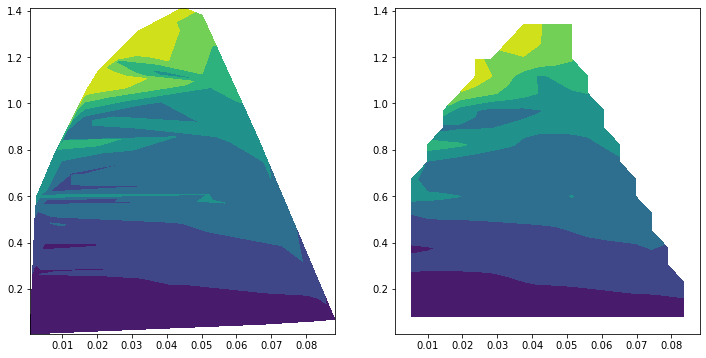

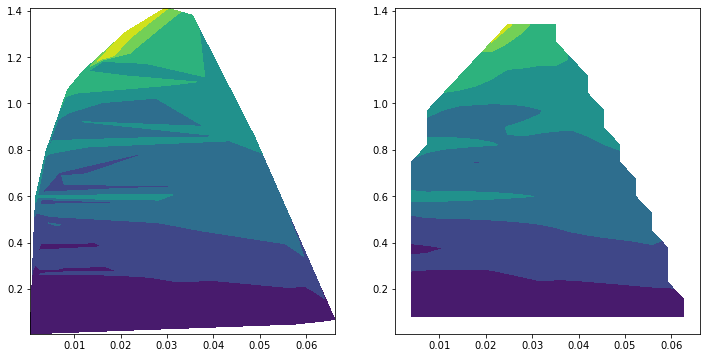

In [106]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].tricontourf(xxu,yyu,zzu)
import numpy as np
from scipy.interpolate import griddata

xi = np.linspace(xxu.min(), xxu.max(), 20)
yi = np.linspace(yyu.min(), yyu.max(), 20)
zi = griddata((xxu, yyu), zzu, (xi[None,:], yi[:,None]), method='linear')
ax[1].contourf(xi, yi, zi)
fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].tricontourf(xxv,yyv,zzv)
import numpy as np
from scipy.interpolate import griddata

xi = np.linspace(xxv.min(), xxv.max(), 20)
yi = np.linspace(yyv.min(), yyv.max(), 20)
zi = griddata((xxv, yyv), zzv, (xi[None,:], yi[:,None]), method='linear')
ax[1].contourf(xi, yi, zi)

In [109]:
Yu,Xu = np.meshgrid(np.sort(yyu),np.sort(xxu))
Yv,Xv = np.meshgrid(np.sort(yyv),np.sort(xxv))
#lev = (Y**2)/(np.sqrt(X**2+2*Y**2)-X)
levu = (np.sqrt(Xu**2+2*Yu**2)+Xu)/2
levv = (np.sqrt(Xv**2+2*Yv**2)+Xv)/2

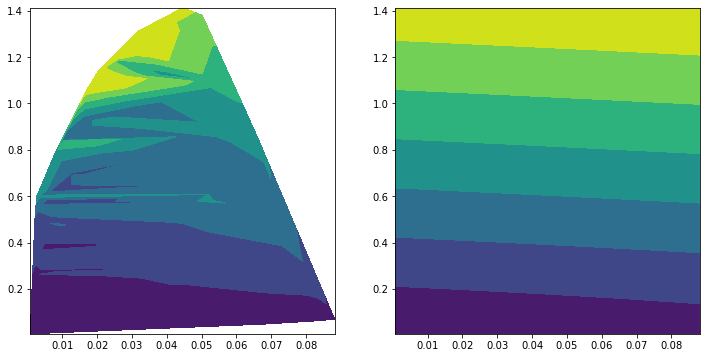

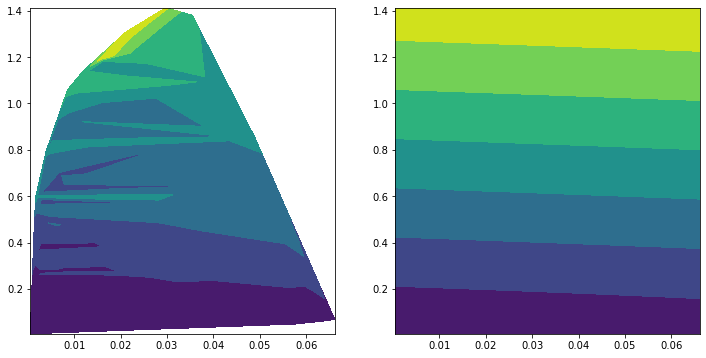

In [110]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].tricontourf(xxu,yyu,zzu)
ax[1].contourf(Xu,Yu,levu)
fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].tricontourf(xxv,yyv,zzv)
ax[1].contourf(Xv,Yv,levv)

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    for i,d,c in zip(range(len(ds40)),ds40,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = 1/d[V[0]].sel(param='Tt')
        y = 2*np.pi/d['Ta']
        c = 1/d[V[1]].sel(param='Tt')
        Y,X = np.meshgrid(y,x)
        #lev = (Y**2)/(np.sqrt(X**2+2*Y**2)-X)
        lev = (np.sqrt(X**2+2*Y**2)+X)/2
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        #c = np.full((y.size,4),c)
        cb = ax.scatter(x,y,c=c,edgecolor='lightgrey',vmin=0,vmax=1)
        #ax.plot()
    #ax.contour(X,Y,lev,levels=10,vmin=0,vmax=1)
    ax.legend() 
    ax.grid()
    ax.set_ylim(0,1.42);ax.set_xlim(0,0.09)
    handles,labels = ax.get_legend_handles_labels()
    ax.set_ylabel(r'kU',fontsize=fontsize)
    ax.set_xlabel(r'1/$\tilde{T}_E$',fontsize=fontsize)
    fig.colorbar(cb,ax=ax,label=r'1/$\tilde{T}_L$')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


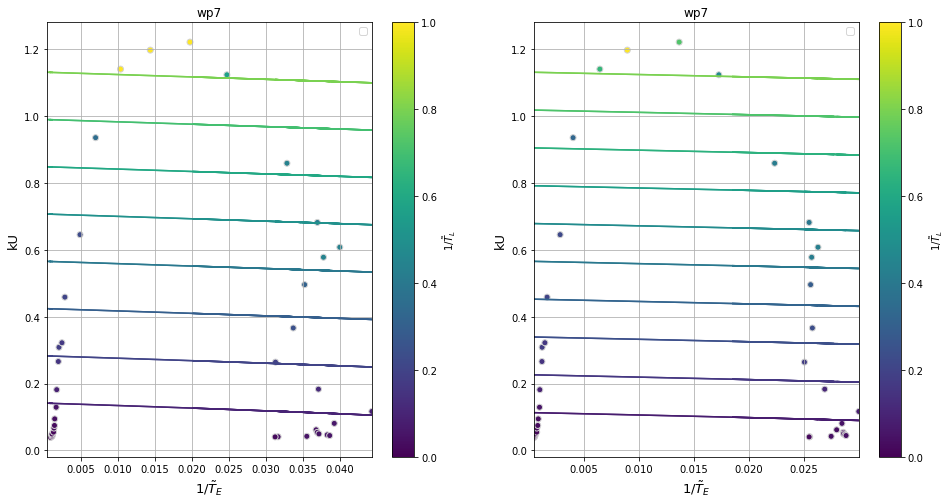

In [16]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
i = -2
d = ds80[i]
for ax,V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    x = 1/d[V[0]].sel(param='Tt')
    y = 2*np.pi/d['Ta']
    c = 1/d[V[1]].sel(param='Tt')
    Y,X = np.meshgrid(y,x)
#    lev = (Y**2)/(np.sqrt(X**2+2*Y**2)-X)
    lev = (np.sqrt(X**2+2*Y**2)+X)/2
    file = sorted(glob(path+'wp*'))[i]
    wp = file[-1]
    #c = np.full((y.size,4),c)
    cb = ax.scatter(x,y,c=c,edgecolor='lightgrey',vmin=0,vmax=1)
    #ax.plot()
    cs = ax.contour(X,Y,lev,levels=10,vmin=0,vmax=1)
    #ax.clabel(cs, inline=False)
    ax.legend() 
    ax.grid();ax.set_title('wp'+wp)
  #  ax.set_ylim(0,1.42);ax.set_xlim(0,0.09)
    handles,labels = ax.get_legend_handles_labels()
    ax.set_ylabel(r'kU',fontsize=fontsize)
    ax.set_xlabel(r'1/$\tilde{T}_E$',fontsize=fontsize)
    fig.colorbar(cb,ax=ax,label=r'1/$\tilde{T}_L$')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


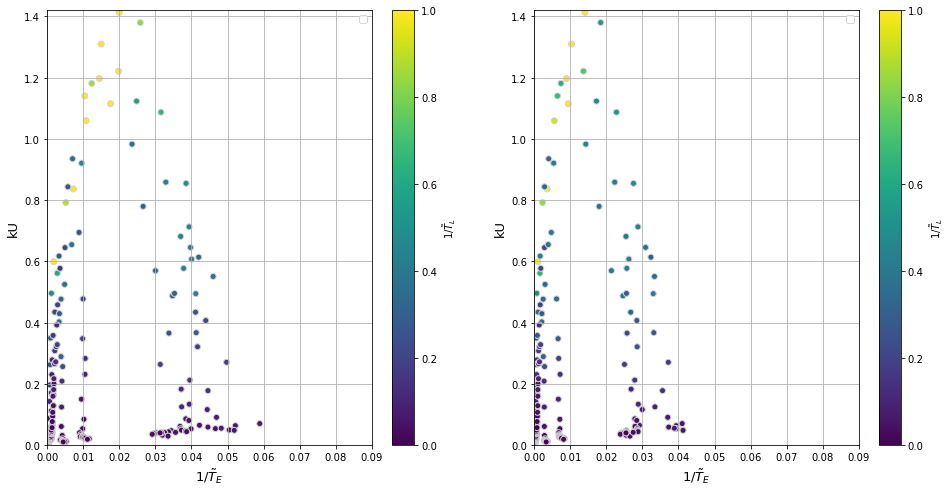

In [17]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    for i,d,c in zip(range(len(ds80)),ds80,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = 1/d[V[0]].sel(param='Tt')
        y = 2*np.pi/d['Ta']
        c = 1/d[V[1]].sel(param='Tt')
        Y,X = np.meshgrid(y,x)
       # lev = (Y**2)/(np.sqrt(X**2+2*Y**2)-X)
        lev = (np.sqrt(X**2+2*Y**2)+X)/2
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        #c = np.full((y.size,4),c)
        ax.scatter(x,y,c=c,edgecolor='lightgrey')
        #ax.plot()
 #       ax.contour(X,Y,lev,levels=10)
    ax.legend() 
    ax.grid()
    ax.set_ylim(0,1.42);ax.set_xlim(0,0.09)
    handles,labels = ax.get_legend_handles_labels()
    ax.set_ylabel(r'kU',fontsize=fontsize)
    ax.set_xlabel(r'1/$\tilde{T}_E$',fontsize=fontsize)
    fig.colorbar(cb,ax=ax,label=r'1/$\tilde{T}_L$')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


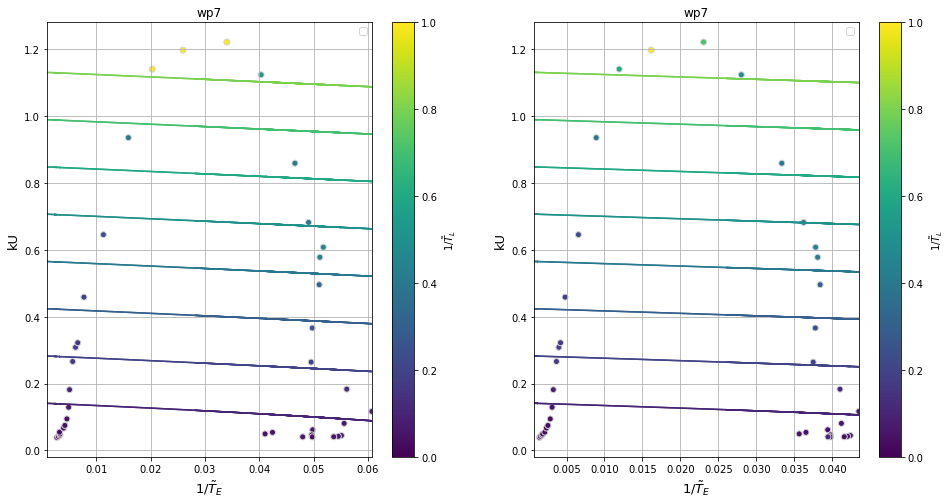

In [18]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
i = -2
d = ds40[i]
for ax,V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    x = 1/d[V[0]].sel(param='Tt')
    y = 2*np.pi/d['Ta']
    c = 1/d[V[1]].sel(param='Tt')
    Y,X = np.meshgrid(y,x)
#    lev = (Y**2)/(np.sqrt(X**2+2*Y**2)-X)
    lev = (np.sqrt(X**2+2*Y**2)+X)/2
    file = sorted(glob(path+'wp*'))[i]
    wp = file[-1]
    #c = np.full((y.size,4),c)
    cb = ax.scatter(x,y,c=c,edgecolor='lightgrey',vmin=0,vmax=1)
    #ax.plot()
    cs = ax.contour(X,Y,lev,levels=10,vmin=0,vmax=1)
    #ax.clabel(cs, inline=False)
    ax.legend() 
    ax.grid();ax.set_title('wp'+wp)
  #  ax.set_ylim(0,1.42);ax.set_xlim(0,0.09)
    handles,labels = ax.get_legend_handles_labels()
    ax.set_ylabel(r'kU',fontsize=fontsize)
    ax.set_xlabel(r'1/$\tilde{T}_E$',fontsize=fontsize)
    fig.colorbar(cb,ax=ax,label=r'1/$\tilde{T}_L$')

In [4]:
ds = xr.open_dataset(path+'ZC_param_fit_T80_weighted.nc')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


(0, 0.045)

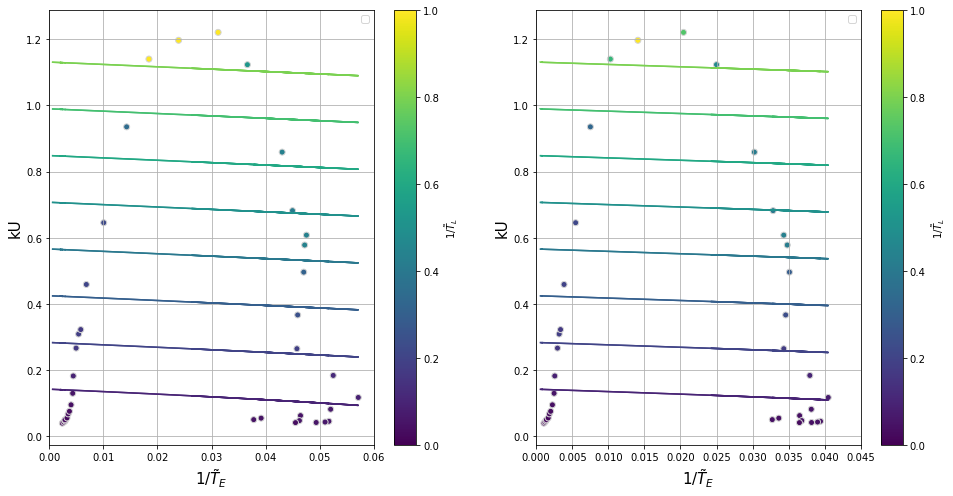

In [11]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
i = -2
d = ds
for ax,V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    x = 1/d[V[0]].sel(param='Tt')
    y = 2*np.pi/d['Ta']
    c = 1/d[V[1]].sel(param='Tt')
    Y,X = np.meshgrid(y,x)
#    lev = (Y**2)/(np.sqrt(X**2+2*Y**2)-X)
    lev = (np.sqrt(X**2+2*Y**2)+X)/2
    
    #c = np.full((y.size,4),c)
    cb = ax.scatter(x,y,c=c,edgecolor='lightgrey',vmin=0,vmax=1)
    #ax.plot()
    cs = ax.contour(X,Y,lev,levels=10,vmin=0,vmax=1)
    #ax.clabel(cs, inline=False)
    ax.legend() 
    ax.grid()#;ax.set_title('wp'+wp)
  #  ax.set_ylim(0,1.42);ax.set_xlim(0,0.09)
    handles,labels = ax.get_legend_handles_labels()
    ax.set_ylabel(r'kU',fontsize=15)
    ax.set_xlabel(r'1/$\tilde{T}_E$',fontsize=15)
    fig.colorbar(cb,ax=ax,label=r'1/$\tilde{T}_L$')
axs[0].set_xlim(0,0.06);axs[1].set_xlim(0,0.045)

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


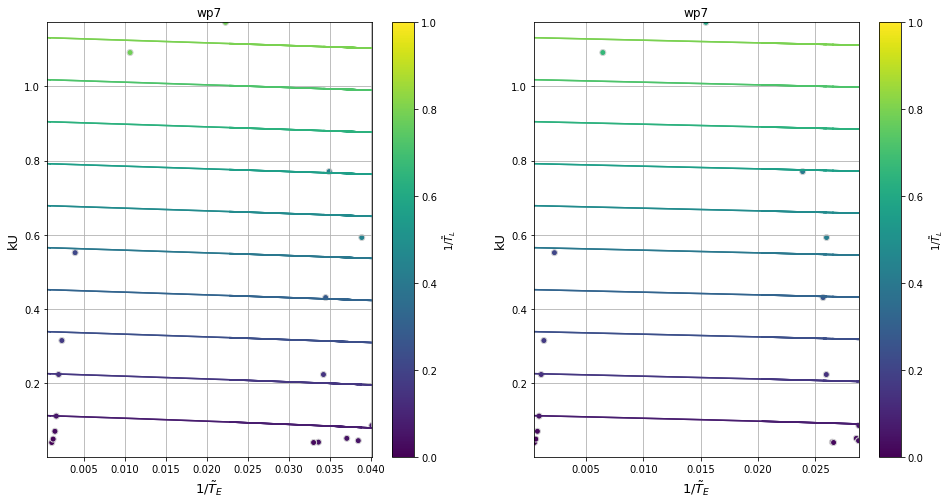

In [19]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
i = -2
d = ds80[i]
for ax,V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    x = 1/d[V[0]].sel(param='Tt')
    y = 2*np.pi/d['Ta']
    c = 1/d[V[1]].sel(param='Tt')
    x = x.groupby_bins('ybin',bins=25).mean()
    y = y.groupby_bins('ybin',bins=25).mean()
    c= c.groupby_bins('ybin',bins=25).mean()
    Y,X = np.meshgrid(y,x)
#    lev = (Y**2)/(np.sqrt(X**2+2*Y**2)-X)
    lev = (np.sqrt(X**2+2*Y**2)+X)/2
    file = sorted(glob(path+'wp*'))[i]
    wp = file[-1]
    #c = np.full((y.size,4),c)
    cb = ax.scatter(x,y,c=c,edgecolor='lightgrey',vmin=0,vmax=1)
    #ax.plot()
    cs = ax.contour(X,Y,lev,levels=10,vmin=0,vmax=1)
    #ax.clabel(cs, inline=False)
    ax.grid();ax.set_title('wp'+wp)
  #  ax.set_ylim(0,1.42);ax.set_xlim(0,0.09)
    handles,labels = ax.get_legend_handles_labels()
    ax.set_ylabel(r'kU',fontsize=fontsize)
    ax.set_xlabel(r'1/$\tilde{T}_E$',fontsize=fontsize)
    fig.colorbar(cb,ax=ax,label=r'1/$\tilde{T}_L$')

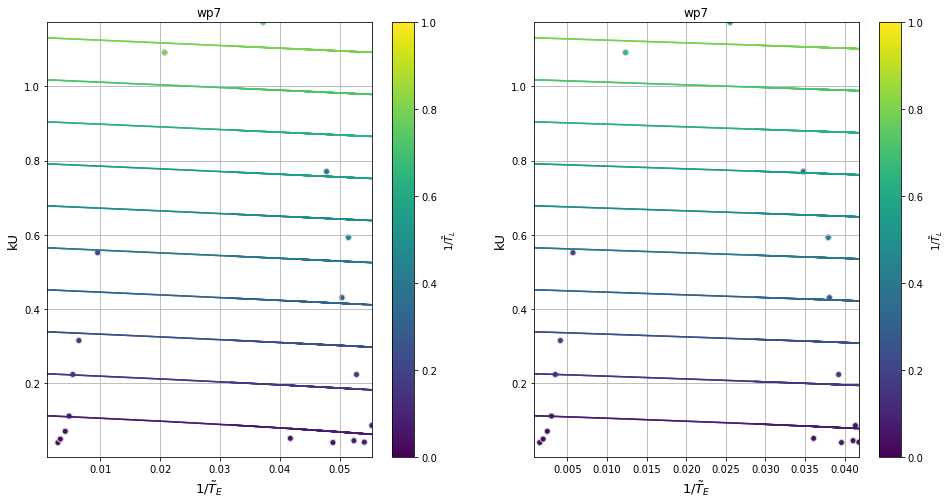

In [20]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
i = -2
d = ds40[i]
for ax,V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    x = 1/d[V[0]].sel(param='Tt')
    y = 2*np.pi/d['Ta']
    c = 1/d[V[1]].sel(param='Tt')
    x = x.groupby_bins('ybin',bins=25).mean()
    y = y.groupby_bins('ybin',bins=25).mean()
    c= c.groupby_bins('ybin',bins=25).mean()
    Y,X = np.meshgrid(y,x)
#    lev = (Y**2)/(np.sqrt(X**2+2*Y**2)-X)
    lev = (np.sqrt(X**2+2*Y**2)+X)/2
    file = sorted(glob(path+'wp*'))[i]
    wp = file[-1]
    #c = np.full((y.size,4),c)
    cb = ax.scatter(x,y,c=c,edgecolor='lightgrey',vmin=0,vmax=1)
    #ax.plot()
    cs = ax.contour(X,Y,lev,levels=10,vmin=0,vmax=1)
    #ax.clabel(cs, inline=False)
    ax.grid();ax.set_title('wp'+wp)
  #  ax.set_ylim(0,1.42);ax.set_xlim(0,0.09)
    handles,labels = ax.get_legend_handles_labels()
    ax.set_ylabel(r'kU',fontsize=fontsize)
    ax.set_xlabel(r'1/$\tilde{T}_E$',fontsize=fontsize)
    fig.colorbar(cb,ax=ax,label=r'1/$\tilde{T}_L$')

In [5]:
number = len(ds)
cmap_Ta = plt.get_cmap('Greys')
cmap_Te = plt.get_cmap('Blues')
cmap_Tl = plt.get_cmap('Reds')
colors_Ta = [cmap_Ta(i) for i in np.linspace(0.5, 1, number)]
colors_Te = [cmap_Te(i) for i in np.linspace(.5, 1, number)]
colors_Tl = [cmap_Tl(i) for i in np.linspace(.5, 1, number)]

Text(0.5, 1.0, '')

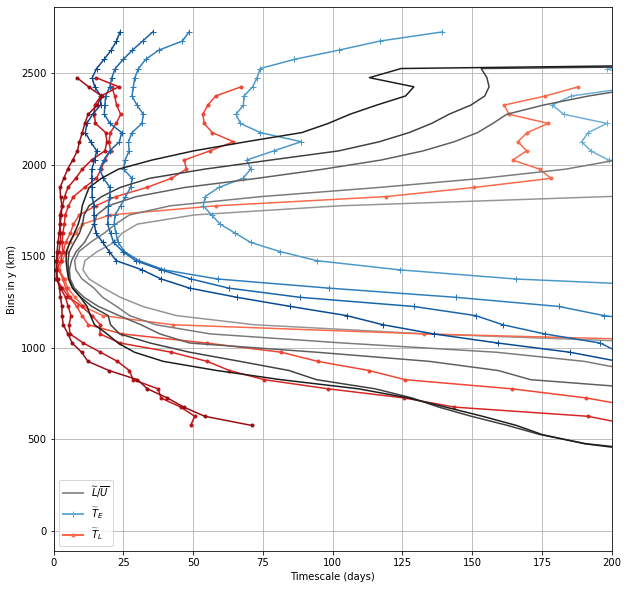

In [14]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap_Ta(0.5), lw=2),
                Line2D([0], [0], color=cmap_Te(.5), lw=2,marker='+'),
                Line2D([0], [0], color=cmap_Tl(.5), lw=2,marker='.')]
fig,ax = plt.subplots(figsize=(10,10))
for i,d in enumerate(ds):
    d['Ta'].plot(ax=ax,y='ybin',c=colors_Ta[i])
    d['E_u_avg'].sel(param='Tt').plot(ax=ax,y='ybin',c=colors_Te[i],marker='+')
    d['L_u_avg'].sel(param='Tt').plot(ax=ax,y='ybin',c=colors_Tl[i],marker='.')
ax.grid();ax.set_xlim(0,200)#;ax.legend()
ax.set_xlabel('Timescale (days)');ax.set_ylabel('Bins in y (km)')
ax.legend(custom_lines, [r'$\widetilde{L}/\overline{U}$', r'$\widetilde{T}_E$', r'$\widetilde{T}_L$'])
ax.set_title('')


(0.0, 200.0)

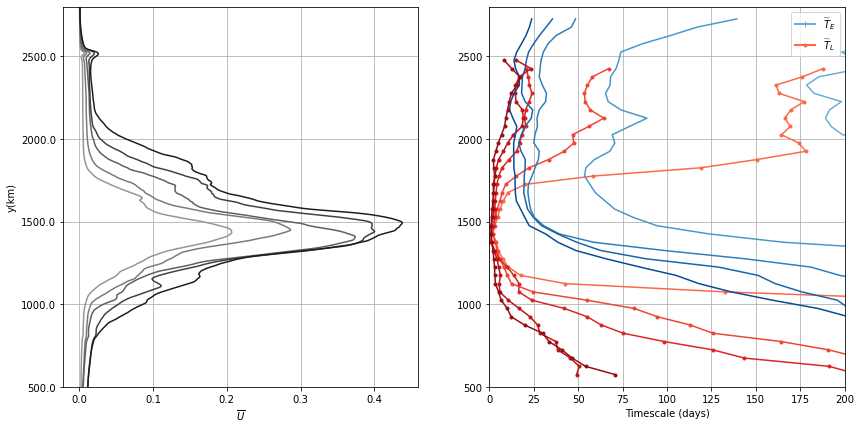

In [20]:
custom_lines = [
                Line2D([0], [0], color=cmap_Te(.5), lw=2,marker='+'),
                Line2D([0], [0], color=cmap_Tl(.5), lw=2,marker='.')]
fig,ax = plt.subplots(1,2,figsize=(14,7))
for i,d in enumerate(ds):
    d['Uprime'].plot(ax=ax[0],y='y_rho',c=colors_Ta[i])
    ax[0].set_xlabel(r'$\overline{U}$');ax[0].set_ylabel(r'y(km)')
    ax[0].set_ylim(500*1e3,2800*1e3)
    laby = ax[0].get_yticks();laby = [str(l*1e-3) for l in laby];
    ax[0].set_yticklabels(laby)
    d['E_u_avg'].sel(param='Tt').plot(ax=ax[1],y='ybin',c=colors_Te[i])
    d['L_u_avg'].sel(param='Tt').plot(ax=ax[1],y='ybin',c=colors_Tl[i],marker='.')
ax[0].grid();ax[0].set_title('');ax[1].grid();ax[1].set_title('');ax[1].set_ylabel('')
ax[1].legend(custom_lines, [r'$\widetilde{T}_E$', r'$\widetilde{T}_L$'])
ax[1].set_xlabel('Timescale (days)')
ax[1].set_ylim(500,2800);ax[1].set_xlim(0,200)

In [8]:
d

<xarray.Dataset>
Dimensions:       (param: 2, y_rho: 722, ybin: 55)
Coordinates:
  * ybin          (ybin) float64 25.0 75.0 125.0 ... 2.675e+03 2.725e+03
    time_instant  float64 ...
    time_counter  float64 ...
    mode          int64 ...
    s_rho         float32 ...
  * param         (param) object 'Tt' 'Xbar'
    f_rho         (y_rho) float32 ...
    f             (y_rho) float32 ...
  * y_rho         (y_rho) float32 -2000.0 2000.0 6000.0 ... 2878000.0 2882000.0
    y_u           (y_rho) float32 ...
    y_bins        (y_rho) float32 ...
Data variables:
    Ta            (ybin) float64 ...
    Ta_rms        (ybin) float64 ...
    E_u_avg       (ybin, param) float64 ...
    L_u_avg       (ybin, param) float64 ...
    E_v_avg       (ybin, param) float64 ...
    L_v_avg       (ybin, param) float64 ...
    Uprime        (y_rho) float32 ...

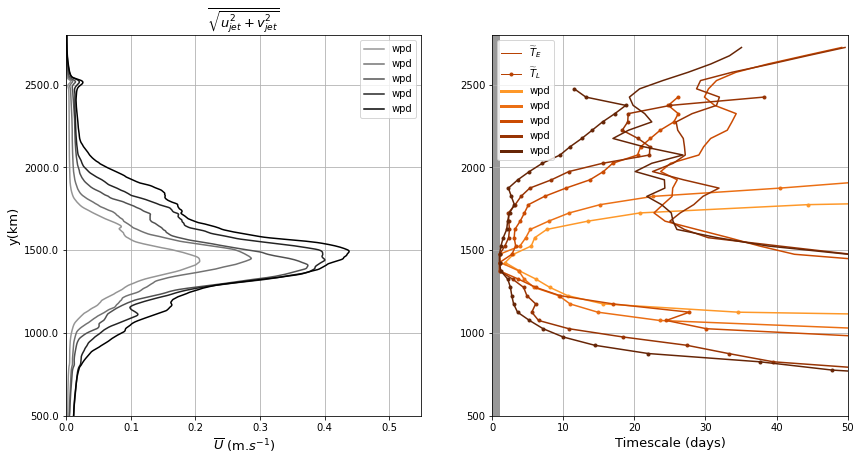

In [10]:
fontsize = 13
number = len(ds)
cmap = plt.get_cmap('YlOrBr')
colors = [cmap(i) for i in np.linspace(0.5, 1, number)]
custom_lines = [
                Line2D([0], [0], color=cmap(.8), lw=1),
                Line2D([0], [0], color=cmap(.8), lw=1,marker='.')
                ]
labels=[r'$\widetilde{T}_E$', r'$\widetilde{T}_L$']
fig,ax = plt.subplots(1,2,figsize=(14,7))
for i,d in enumerate(ds):
    file = sorted(glob(path+'wp*'))[i]
    wp = file[-20:-19]
    d['Uprime'].plot(ax=ax[0],y='y_rho',c=colors_Ta[i],label='wp'+wp)
    ax[0].set_ylim(500*1e3,2800*1e3)
    laby = ax[0].get_yticks();laby = [str(l*1e-3) for l in laby];
    ax[0].set_yticklabels(laby)
    d['E_u_avg'].sel(param='Tt').plot(ax=ax[1],y='ybin',c=colors[i])
    d['L_u_avg'].sel(param='Tt').plot(ax=ax[1],y='ybin',c=colors[i],marker='.')
    custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
    labels.append('wp'+wp)
ax[0].set_xlabel(r'$\overline{U}$ (m.$s^{-1}$)',fontsize=fontsize);ax[0].set_ylabel(r'y(km)',fontsize=fontsize);
ax[0].set_title(r'$\overline{\sqrt{u_{jet}^2+v_{jet}^2}}$',fontsize=fontsize)
ax[0].grid();ax[1].grid();ax[1].set_title('');ax[1].set_ylabel('')
ax[1].legend(custom_lines, labels)
ax[1].set_xlabel('Timescale (days)',fontsize=fontsize)
ax[1].set_ylim(500,2800);ax[0].legend();ax[0].set_xlim(0,0.55);ax[1].set_xlim(0,50)
ax[1].axvspan(0, 1, facecolor='0.2', alpha=0.5)
plt.savefig('/Users/zcaspar/codes/Figures/Synthesis/Tcomp.pdf')

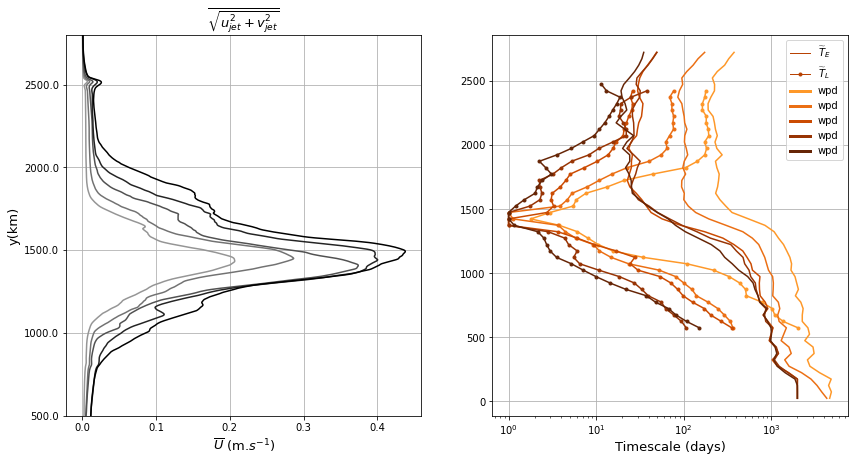

In [16]:
fontsize = 13
number = len(ds)
cmap = plt.get_cmap('YlOrBr')
colors = [cmap(i) for i in np.linspace(0.5, 1, number)]
custom_lines = [
                Line2D([0], [0], color=cmap(.8), lw=1),
                Line2D([0], [0], color=cmap(.8), lw=1,marker='.')
                ]
labels=[r'$\widetilde{T}_E$', r'$\widetilde{T}_L$']
fig,ax = plt.subplots(1,2,figsize=(14,7))
for i,d in enumerate(ds):
    file = sorted(glob(path+'wp*'))[i]
    wp = file[-20:-19]
    d['Uprime'].plot(ax=ax[0],y='y_rho',c=colors_Ta[i],label='wp'+wp)
    ax[0].set_ylim(500*1e3,2800*1e3)
    laby = ax[0].get_yticks();laby = [str(l*1e-3) for l in laby];
    ax[0].set_yticklabels(laby)
    d['E_u_avg'].sel(param='Tt').plot(ax=ax[1],y='ybin',c=colors[i])
    d['L_u_avg'].sel(param='Tt').plot(ax=ax[1],y='ybin',c=colors[i],marker='.')
    custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
    labels.append('wp'+wp)
ax[0].set_xlabel(r'$\overline{U}$ (m.$s^{-1}$)',fontsize=fontsize);ax[0].set_ylabel(r'y(km)',fontsize=fontsize);
ax[0].set_title(r'$\overline{\sqrt{u_{jet}^2+v_{jet}^2}}$',fontsize=fontsize)
ax[0].grid();ax[1].grid();ax[1].set_title('');ax[1].set_ylabel('')
ax[1].legend(custom_lines, labels)
ax[1].set_xlabel('Timescale (days)',fontsize=fontsize)
#ax[1].set_ylim(500,2800);ax[0].legend();ax[0].set_xlim(0,0.55);ax[1].set_xlim(0,50)
#ax[1].axvspan(0, 1, facecolor='0.2', alpha=0.5)
ax[1].set_xscale('log')
#plt.savefig('/Users/zcaspar/codes/Figures/Synthesis/Tcomp.pdf')

Text(0.5, 1.0, '')

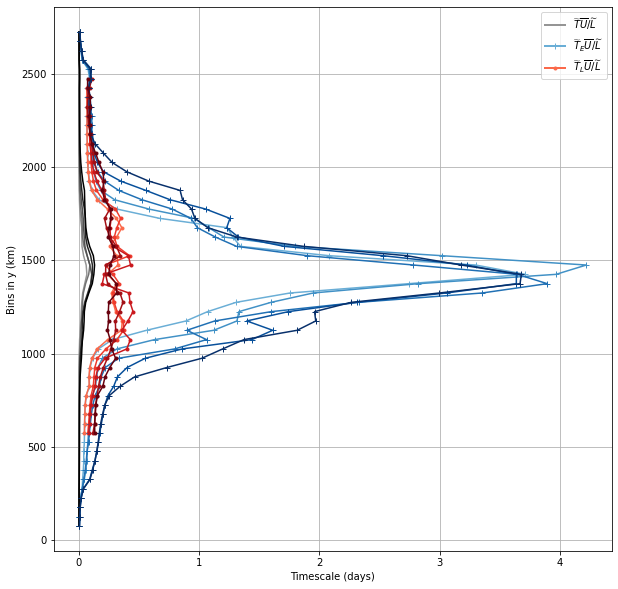

In [8]:
Tw = 0.5
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap_Ta(0.5), lw=2),
                Line2D([0], [0], color=cmap_Te(.5), lw=2,marker='+'),
                Line2D([0], [0], color=cmap_Tl(.5), lw=2,marker='.')]
fig,ax = plt.subplots(figsize=(10,10))
for i,d in enumerate(ds):
    (Tw/d['Ta']).plot(ax=ax,y='ybin',c=colors_Ta[i])
    (d['E_u_avg'].sel(param='Tt')/d['Ta']).plot(ax=ax,y='ybin',c=colors_Te[i],marker='+')
    (d['L_u_avg'].sel(param='Tt')/d['Ta']).plot(ax=ax,y='ybin',c=colors_Tl[i],marker='.')
ax.grid()#;ax.set_xlim(0,50)#;ax.legend()
ax.set_xlabel('Timescale (days)');ax.set_ylabel('Bins in y (km)')
ax.legend(custom_lines, [r'$\widetilde{T}\overline{U}/\widetilde{L}$', r'$\widetilde{T}_E\overline{U}/\widetilde{L}$'
                         , r'$\widetilde{T}_L\overline{U}/\widetilde{L}$'])
ax.set_title('')



Text(0, 0.5, '')

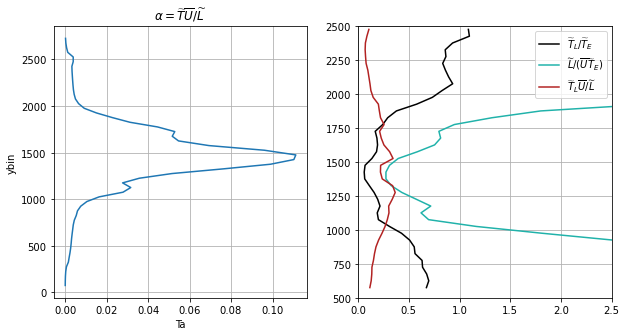

In [9]:
titles = [r'$\alpha = \widetilde{T}\overline{U}/\widetilde{L}$', r'$\widetilde{T}_L/\widetilde{T}_E$'
          , r'$\widetilde{L}/(\overline{U}\widetilde{T}_E)$'
          , r'$\widetilde{T}_L\overline{U}/\widetilde{L}$']
d = ds[-2]
fig,ax = plt.subplots(1,2,figsize=(10,5))
var= [(Tw/d['Ta']),(d['L_u_avg'].sel(param='Tt')/d['E_u_avg'].sel(param='Tt')),
      (d['Ta']/d['E_u_avg'].sel(param='Tt')),(d['L_u_avg'].sel(param='Tt')/d['Ta'])]
var[0].plot(ax=ax[0],y='ybin')
ax[0].grid();ax[0].set_title(titles[0])
for V,title,c in zip(var[1:],titles[1:],['k','lightseagreen','firebrick']):
    V.plot(ax=ax[1],y='ybin',label=title,c=c)
ax[1].grid();ax[1].set_xlim(0,2.5);ax[1].set_ylim(500,2500)
ax[1].legend();ax[1].set_title('');ax[1].set_xlabel('');ax[1].set_ylabel('')

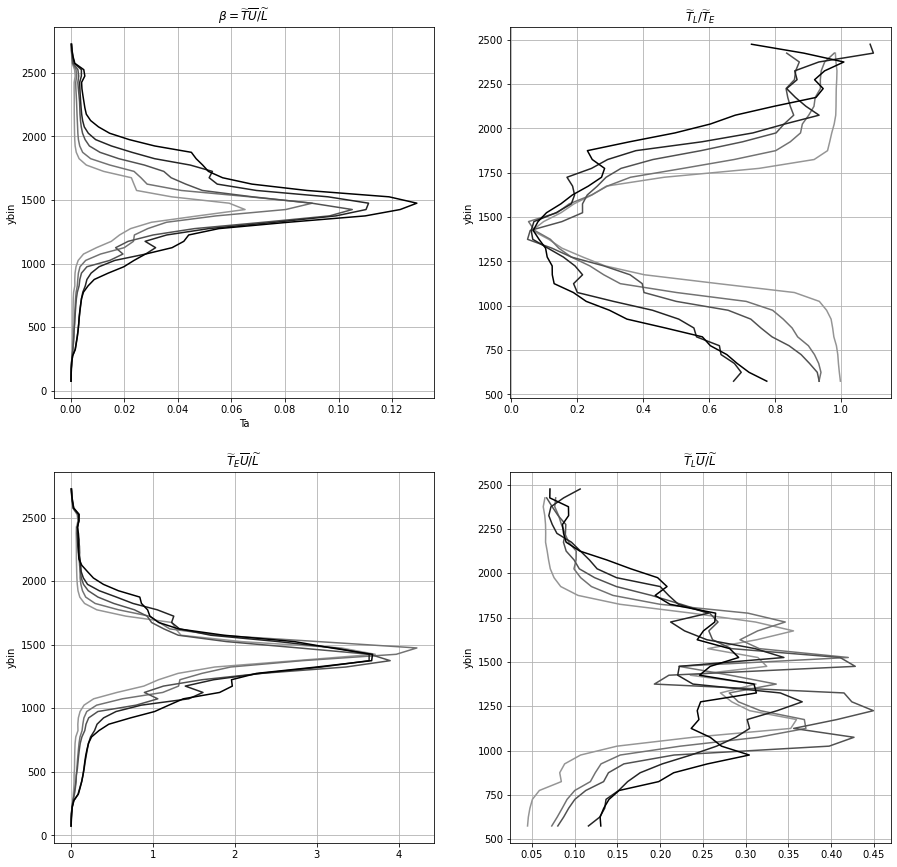

In [10]:
titles = [r'$\beta = \widetilde{T}\overline{U}/\widetilde{L}$', r'$\widetilde{T}_L/\widetilde{T}_E$'
          , r'$\widetilde{T}_E\overline{U}/\widetilde{L}$'
          , r'$\widetilde{T}_L\overline{U}/\widetilde{L}$']

fig,axs = plt.subplots(2,2,figsize=(15,15))
for i,d in enumerate(ds):
    var= [(Tw/d['Ta']),(d['L_u_avg'].sel(param='Tt')/d['E_u_avg'].sel(param='Tt')),
          (d['E_u_avg'].sel(param='Tt')/d['Ta']),(d['L_u_avg'].sel(param='Tt')/d['Ta'])]
    for V,title,ax in zip(var[:-2],titles[:-2],axs[0,:]):
        V.plot(ax=ax,y='ybin',c=colors_Ta[i])
        ax.grid();ax.set_title(title)
    for V,title,ax in zip(var[2:],titles[2:],axs[1,:]):
        V.plot(ax=ax,y='ybin',c=colors_Ta[i])
        ax.grid();ax.set_title(title)


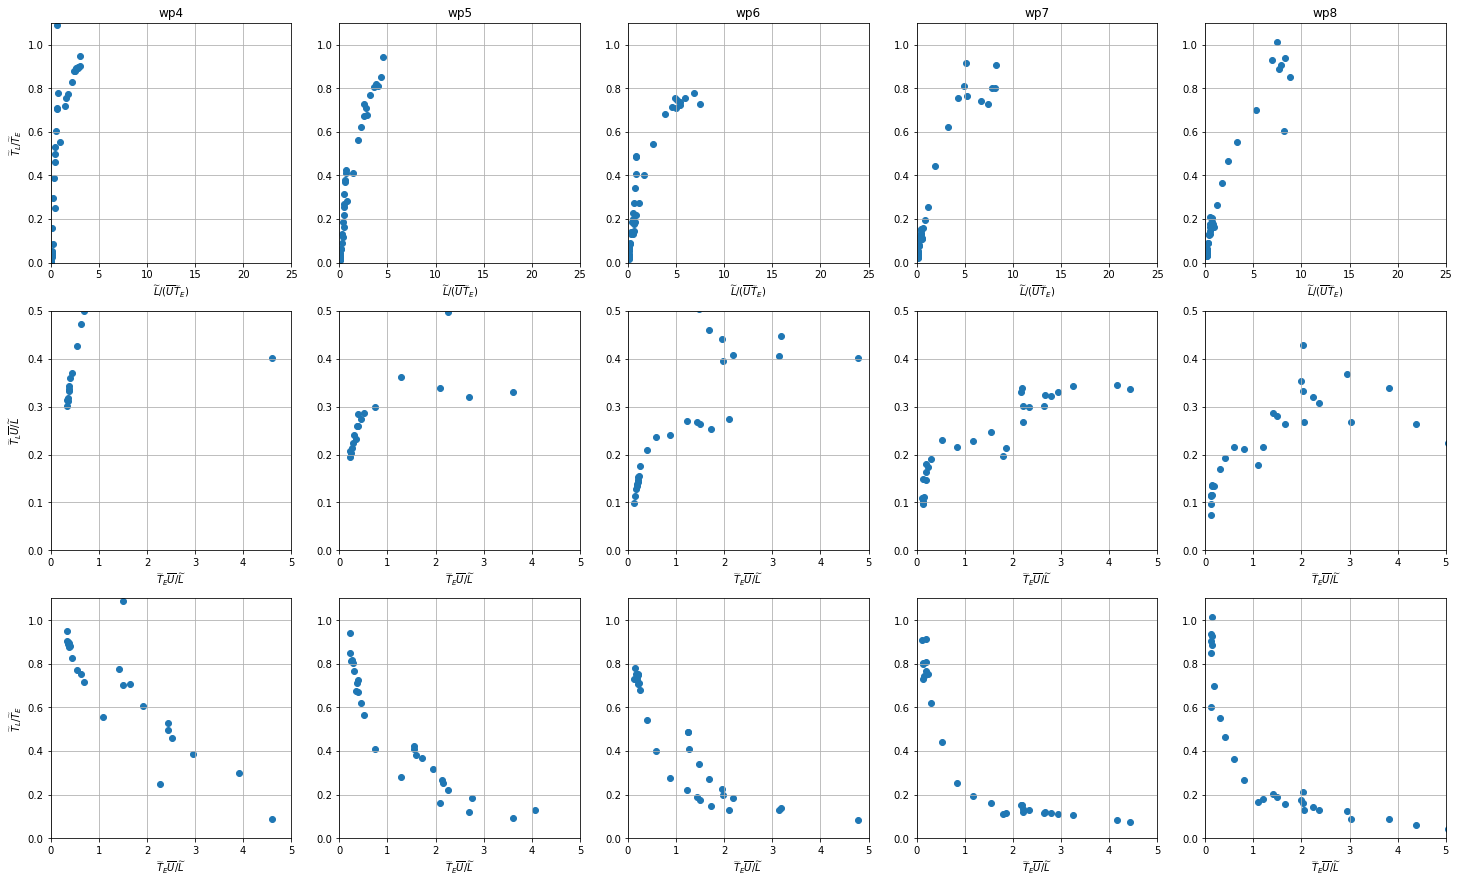

In [22]:
fig,ax = plt.subplots(3,len(ds),figsize=(5*len(ds),15))
for i,d in enumerate(ds):#,['wp4,wp5,wp6,wp7,wp8']):
    x = d['Ta']/d['E_u_avg'].sel(param='Tt')
    y = d['L_u_avg'].sel(param='Tt')/d['E_u_avg'].sel(param='Tt')
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    ax[0,i].scatter(x,y);ax[0,i].set_title('wp'+wp)
    ax[0,i].grid();ax[0,i].set_xlabel(r'$\widetilde{L}/(\overline{U}\widetilde{T}_E)$')
    ax[0,0].set_ylabel(r'$\widetilde{T}_L/\widetilde{T}_E$')
    x = d['E_u_avg'].sel(param='Tt')/d['Ta']
    y = d['L_u_avg'].sel(param='Tt')/d['Ta']
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    ax[1,i].scatter(x,y)
    ax[1,i].grid();ax[1,i].set_xlabel(r'$\widetilde{T}_E\overline{U}/\widetilde{L}$')
    ax[1,0].set_ylabel(r'$\widetilde{T}_L\overline{U}/\widetilde{L}$')
    x = d['E_u_avg'].sel(param='Tt')/d['Ta']
    y = d['L_u_avg'].sel(param='Tt')/d['E_u_avg'].sel(param='Tt')
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    ax[2,i].scatter(x,y)
    ax[2,i].set_xlabel(r'$\widetilde{T}_E\overline{U}/\widetilde{L}$')
    ax[2,0].set_ylabel(r'$\widetilde{T}_L/\widetilde{T}_E$')
    ax[2,i].grid();ax[2,i].set_xlim(0.,5);ax[1,i].set_xlim(0.,5);ax[0,i].set_xlim(0.,25)
    ax[2,i].set_ylim(0.,1.1);ax[1,i].set_ylim(0.,.5);ax[0,i].set_ylim(0.,1.1)

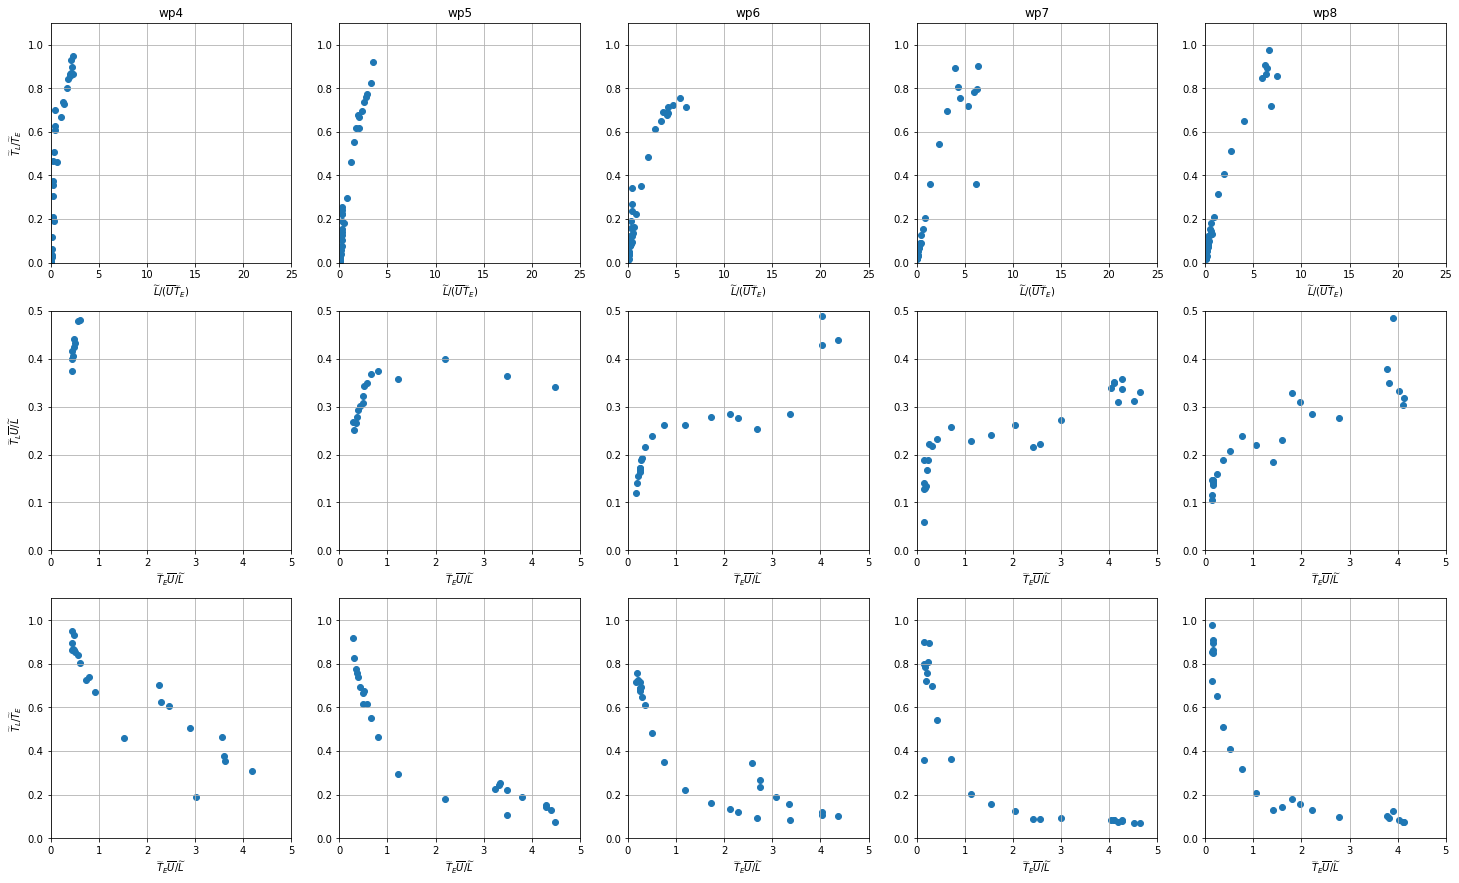

In [23]:
#Derived from v
fig,ax = plt.subplots(3,len(ds),figsize=(5*len(ds),15))
for i,d in enumerate(ds):#,['wp4,wp5,wp6,wp7,wp8']):
    x = d['Ta']/d['E_v_avg'].sel(param='Tt')
    y = d['L_v_avg'].sel(param='Tt')/d['E_v_avg'].sel(param='Tt')
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    ax[0,i].scatter(x,y);ax[0,i].set_title('wp'+wp)
    ax[0,i].grid();ax[0,i].set_xlabel(r'$\widetilde{L}/(\overline{U}\widetilde{T}_E)$')
    ax[0,0].set_ylabel(r'$\widetilde{T}_L/\widetilde{T}_E$')
    x = d['E_v_avg'].sel(param='Tt')/d['Ta']
    y = d['L_v_avg'].sel(param='Tt')/d['Ta']
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    ax[1,i].scatter(x,y)
    ax[1,i].grid();ax[1,i].set_xlabel(r'$\widetilde{T}_E\overline{U}/\widetilde{L}$')
    ax[1,0].set_ylabel(r'$\widetilde{T}_L\overline{U}/\widetilde{L}$')
    x = d['E_v_avg'].sel(param='Tt')/d['Ta']
    y = d['L_v_avg'].sel(param='Tt')/d['E_v_avg'].sel(param='Tt')
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    ax[2,i].scatter(x,y)
    ax[2,i].set_xlabel(r'$\widetilde{T}_E\overline{U}/\widetilde{L}$')
    ax[2,0].set_ylabel(r'$\widetilde{T}_L/\widetilde{T}_E$')
    ax[2,i].grid();ax[2,i].set_xlim(0.,5);ax[1,i].set_xlim(0.,5);ax[0,i].set_xlim(0.,25)
    ax[2,i].set_ylim(0.,1.1);ax[1,i].set_ylim(0.,.5);ax[0,i].set_ylim(0.,1.1)

In [24]:
number = len(ds)
cmap = plt.get_cmap('YlOrBr')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

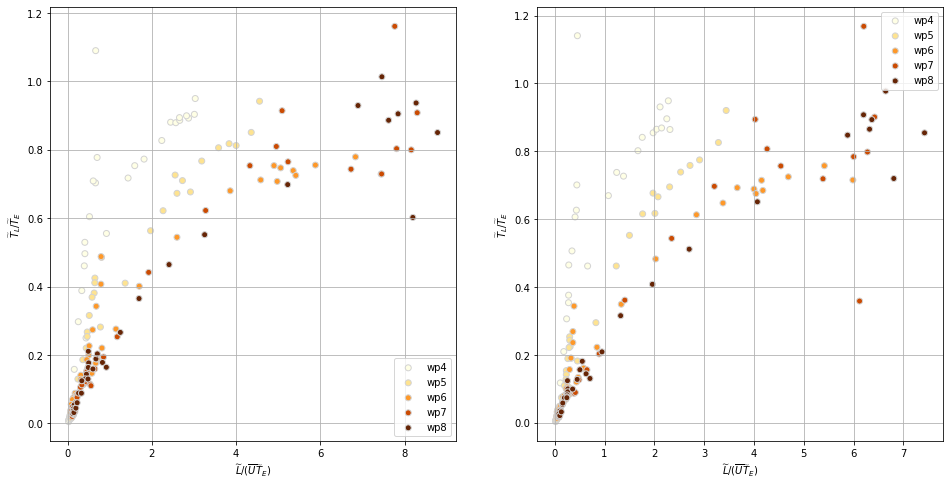

In [25]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    for i,d,c in zip(range(len(ds)),ds,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = d['Ta']/d[V[0]].sel(param='Tt')
        y = d[V[1]].sel(param='Tt')/d[V[0]].sel(param='Tt')
        file = sorted(glob(path+'jet*1000j'))[i]
        wp = file[-20:-19]
        c = np.full((y.size,4),c)
        ax.scatter(x,y,label='wp'+wp,c=c,edgecolor='lightgrey')
    ax.set_xlabel(r'$\widetilde{L}/(\overline{U}\widetilde{T}_E)$')
    ax.set_ylabel(r'$\widetilde{T}_L/\widetilde{T}_E$')
    ax.grid()
    ax.legend()

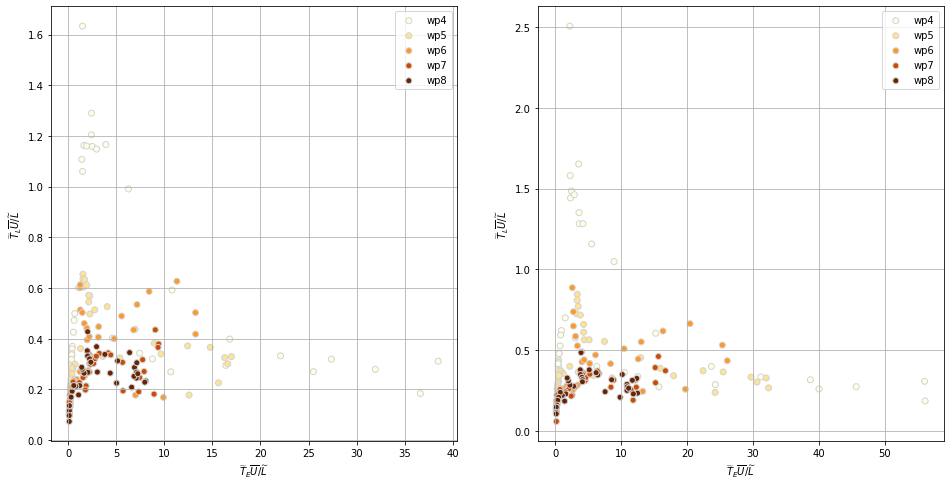

In [26]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    for i,d,c in zip(range(len(ds)),ds,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = d[V[0]].sel(param='Tt')/d['Ta']
        y = d[V[1]].sel(param='Tt')/d['Ta']
        file = sorted(glob(path+'jet*1000j'))[i]
        wp = file[-20:-19]
        c = np.full((y.size,4),c)
        ax.scatter(x,y,label='wp'+wp,c=c,edgecolor='lightgrey')
    ax.grid()
    ax.legend()
    ax.set_xlabel(r'$\widetilde{T}_E\overline{U}/\widetilde{L}$')
    ax.set_ylabel(r'$\widetilde{T}_L\overline{U}/\widetilde{L}$')

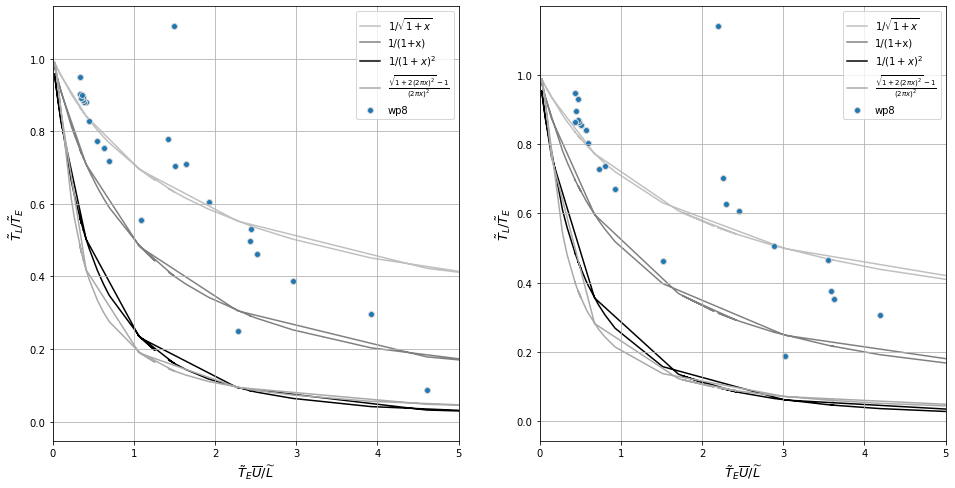

In [38]:
d = ds[0]
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    x = d[V[0]].sel(param='Tt')/d['Ta']
    y = d[V[1]].sel(param='Tt')/d[V[0]].sel(param='Tt')
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
   # c = np.full((y.size,4),c)
    ax.scatter(x,y,label='wp'+wp,edgecolor='lightgrey')
    ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
    ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
    ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    ax.plot(x,(np.sqrt(1+2*(2*np.pi*x)**2)-1)/((2*np.pi*x)**2),c='darkgrey',zorder=-1,label=r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
#    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
    ax.grid()
    ax.legend()
    ax.set_xlabel(r'$\tilde{T}_E\overline{U}/\widetilde{L}$',fontsize=fontsize)
    ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)
    ax.set_xlim(0,5)

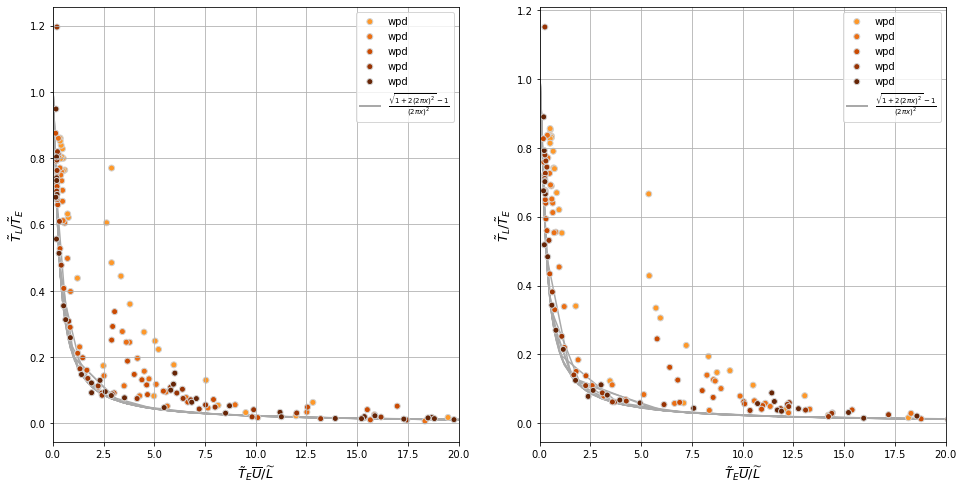

In [12]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    for i,d,c in zip(range(len(ds)),ds,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = d[V[0]].sel(param='Tt')/d['Ta']
        y = d[V[1]].sel(param='Tt')/d[V[0]].sel(param='Tt')
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-20:-19]
        c = np.full((y.size,4),c)
        ax.scatter(x,y,label= 'wp'+wp,c=c,edgecolor='lightgrey')
        #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
        #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
        #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
        ax.plot(x,(np.sqrt(1+2*(2*np.pi*x)**2)-1)/((2*np.pi*x)**2),c='darkgrey',zorder=-1)
#    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
    #labels.append(r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
    ax.grid()
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)],labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$'])
    ax.set_xlabel(r'$\tilde{T}_E\overline{U}/\widetilde{L}$',fontsize=fontsize)
    ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)
    ax.set_xlim(0,20)
plt.savefig('/Users/zcaspar/codes/Figures/Synthesis/TlTe_TaTe.pdf')

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    for i,d,c in zip(range(len(ds)),ds,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = d[V[0]].sel(param='Tt')/d['Ta']
        y = d[V[1]].sel(param='Tt')/d[V[0]].sel(param='Tt')
        file = sorted(glob(path+'jet*1000j'))[i]
        wp = file[-20:-19]
        c = np.full((y.size,4),c)
        ax.scatter(x,y,label='wp'+wp,c=c,edgecolor='lightgrey')
    ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
    ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
    ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    ax.plot(x,(np.sqrt(1+2*(2*np.pi*x)**2)-1)/((2*np.pi*x)**2),c='darkgrey',zorder=-1,label=r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
#    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
    ax.grid()
    ax.legend()
    ax.set_xlabel(r'$\tilde{T}_E\overline{U}/\widetilde{L}$',fontsize=fontsize)
    ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)
    ax.set_xlim(0,5)

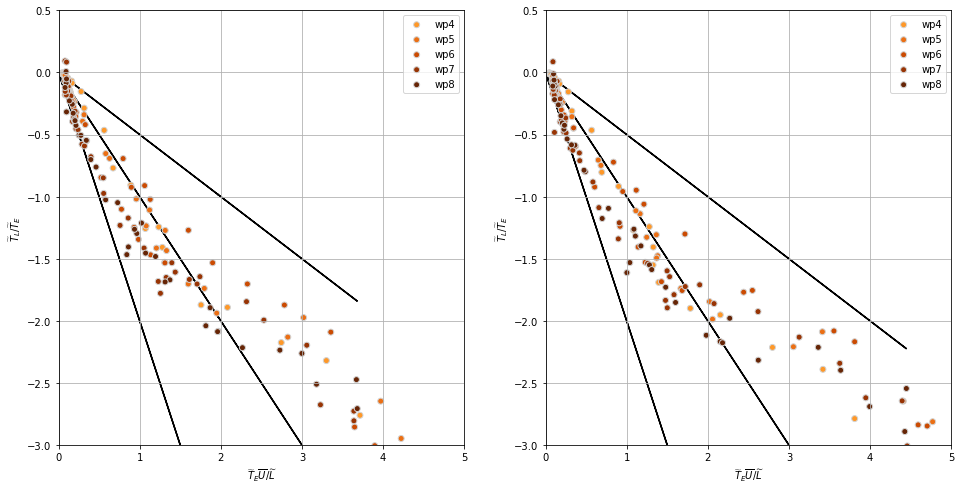

In [13]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    for i,d,c in zip(range(len(ds)),ds,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = d[V[0]].sel(param='Tt')/d['Ta']
        y = d[V[1]].sel(param='Tt')/d[V[0]].sel(param='Tt')
        file = sorted(glob(path+'jet*1000j'))[i]
        wp = file[-20:-19]
        c = np.full((y.size,4),c)
        ax.scatter(x,np.log(y),label='wp'+wp,c=c,edgecolor='lightgrey')
    ax.plot(x,-2*x,'k',zorder=-1)
    ax.plot(x,-1*x,'k',zorder=-1)
    ax.plot(x,-1/2*x,'k',zorder=-1)
#    ax.plot(x,np.log(1/np.sqrt(1+x)),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
#    ax.plot(x,np.log(1/(1+x)),c='grey',zorder=-1,label=r'1/(1+x)')
#    ax.plot(x,np.log(1/((1+x)**2)),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    ax.grid();ax.set_ylim(-3,0.5)
    ax.legend()
    ax.set_xlabel(r'$\widetilde{T}_E\overline{U}/\widetilde{L}$')
    ax.set_ylabel(r'$\widetilde{T}_L/\widetilde{T}_E$')

    ax.set_xlim(0,5)

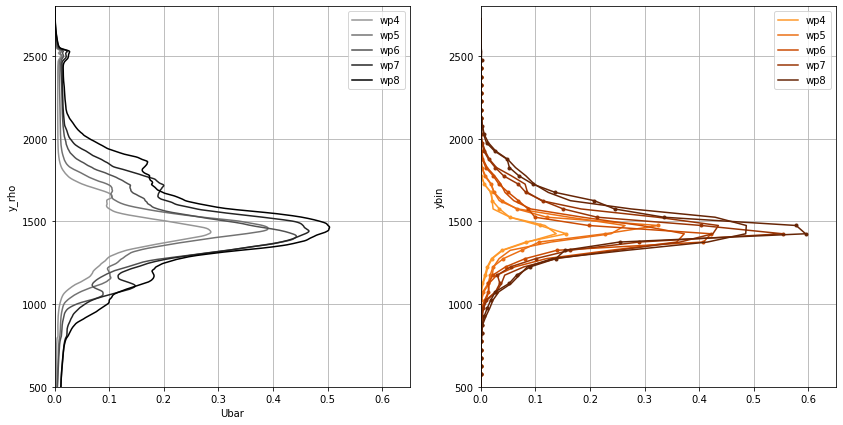

In [14]:
fig,ax = plt.subplots(1,2,figsize=(14,7))
for i,d in enumerate(ds):
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    #d['Ubar'].reset_coords({'y_rho':d['Ubar'].y_rho.values*1e-3}).y_rho.values
    d['Ubar'].assign_coords({'y_rho':d['Ubar'].y_rho*1e-3}).plot(ax=ax[0],y='y_rho',c=colors_Ta[i],label='wp'+wp)
    np.sqrt(d['L_v'].sel(param='Xbar')**2+d['L_u'].sel(param='Xbar')**2).plot(ax=ax[1],y='ybin',c=colors[i],marker='.')
    np.sqrt(d['E_v'].sel(param='Xbar')**2+d['E_u'].sel(param='Xbar')**2).plot(ax=ax[1],y='ybin',c=colors[i],label='wp'+wp)
    ax[0].set_ylim(500,2800);ax[0].grid();ax[0].set_xlim(0,0.65);ax[0].set_title('')
    ax[1].set_ylim(500,2800);ax[1].grid();ax[1].set_xlim(0,0.65);ax[1].set_title('')
    ax[0].legend();ax[1].legend()

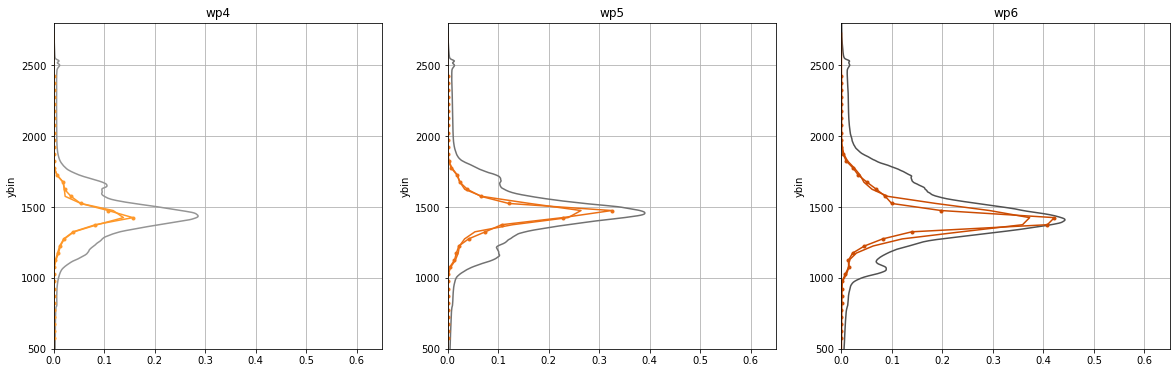

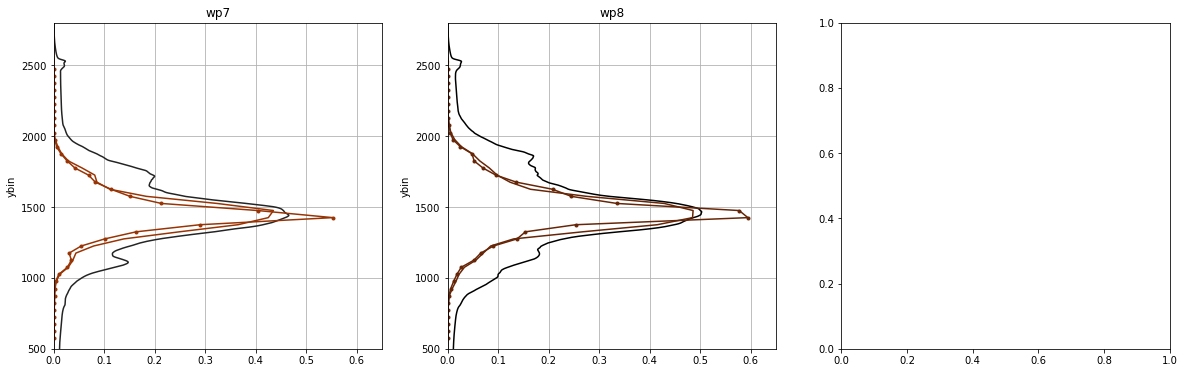

In [15]:
fig,ax = plt.subplots(1,3,figsize=(20,6))
for i,d in enumerate(ds[:3]):
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    #d['Ubar'].reset_coords({'y_rho':d['Ubar'].y_rho.values*1e-3}).y_rho.values
    d['Ubar'].assign_coords({'y_rho':d['Ubar'].y_rho*1e-3}).plot(ax=ax[i],y='y_rho',c=colors_Ta[i],label='wp'+wp)
    np.sqrt(d['L_v'].sel(param='Xbar')**2+d['L_u'].sel(param='Xbar')**2).plot(ax=ax[i],y='ybin',c=colors[i],marker='.')
    np.sqrt(d['E_v'].sel(param='Xbar')**2+d['E_u'].sel(param='Xbar')**2).plot(ax=ax[i],y='ybin',c=colors[i])
    ax[i].set_ylim(500,2800);ax[i].grid();ax[i].set_xlim(0,0.65);ax[i].set_title('wp'+wp)
fig,ax = plt.subplots(1,3,figsize=(20,6))
for i,d in enumerate(ds[3:]):
    file = sorted(glob(path+'jet*1000j'))[i+3]
    wp = file[-20:-19]
    #d['Ubar'].reset_coords({'y_rho':d['Ubar'].y_rho.values*1e-3}).y_rho.values
    d['Ubar'].assign_coords({'y_rho':d['Ubar'].y_rho*1e-3}).plot(ax=ax[i],y='y_rho',c=colors_Ta[i+3],label='wp'+wp)
    np.sqrt(d['L_v'].sel(param='Xbar')**2+d['L_u'].sel(param='Xbar')**2).plot(ax=ax[i],y='ybin',c=colors[i+3],marker='.')
    np.sqrt(d['E_v'].sel(param='Xbar')**2+d['E_u'].sel(param='Xbar')**2).plot(ax=ax[i],y='ybin',c=colors[i+3])
    ax[i].set_ylim(500,2800);ax[i].grid();ax[i].set_xlim(0,0.65);ax[i].set_title('wp'+wp)
